# Fachprojekt Machine Learning
Authors: Anastasiia Korzhylova, Ivan Shishkin, Ramneek Agnihotri, Rodi Mehi

**Due date:** Wednesday, 12. June 2024

## Import necessary components

In [1]:
# Import the necessary libraries
import time
import torch, torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR, ExponentialLR, CosineAnnealingLR

# Import the VAE model and functions
import networks
from datasets import create_datasets
from evaluation import evaluate
from sampling import sample, plot_reconstruction

## Set hyperparameters, loss function and optimizing tools

In [2]:
# Hyperparameters
batch_size = 128 # Number of images per update of the network
num_epochs = 75 # One epoch means seeing every image of the training datasetSS
latent_dim = 256  # Size of the latent space
input_channels = 3  # CIFAR-10 images have 3 color channels
learning_rate = 5e-5 # Determines how drastically the parameters of the network change

# Select the device that will be used for training: GPU, if available, otherwise CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')
print('=========================================')

# Put the neural network on the selected device
model = networks.VAE(input_channels, latent_dim)
model.to(device)

# Loss function
def loss_function(recon_x, x, mu, logvar):
    MSE = F.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return MSE + 0.0001*KLD

# Optimizer selection
optimizer_option = 'adamw'

optimizer = None
if optimizer_option == "adam":
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
elif optimizer_option == "adamw":
  optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
elif optimizer_option == "rmsprop":
  optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
else:
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Learning rate scheduler parameters
lr_schedule_option = 'cosine'

scheduler = None
if lr_schedule_option == 'step':
  scheduler = StepLR(optimizer, step_size=30, gamma=0.5)
elif lr_schedule_option == 'exponential':
  scheduler = ExponentialLR(optimizer, gamma=0.9)
elif lr_schedule_option == 'cosine':
  scheduler = CosineAnnealingLR(optimizer, T_max=50, eta_min=1e-5)

# Scaler for AMP
scaler = torch.cuda.amp.GradScaler()

Using device: cuda


## Choose a dataset for training

100%|██████████| 170498071/170498071 [00:10<00:00, 16106266.77it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


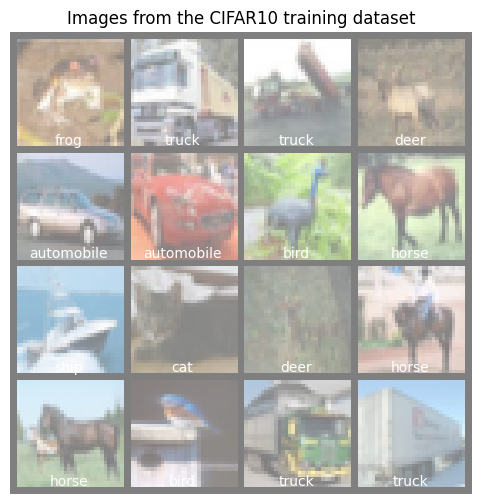

In [3]:
# Create and visualize the datasets for MNIST / CIFAR10
dataset_name = 'CIFAR10'
train_loader, test_loader = create_datasets(dataset_name, batch_size)

## Training loop

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv_transpose2d(
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  ret

Epoch 1, Mean Test Loss: 11177.8479065714, Learning Rate: 0.000050, Time: 8.74s


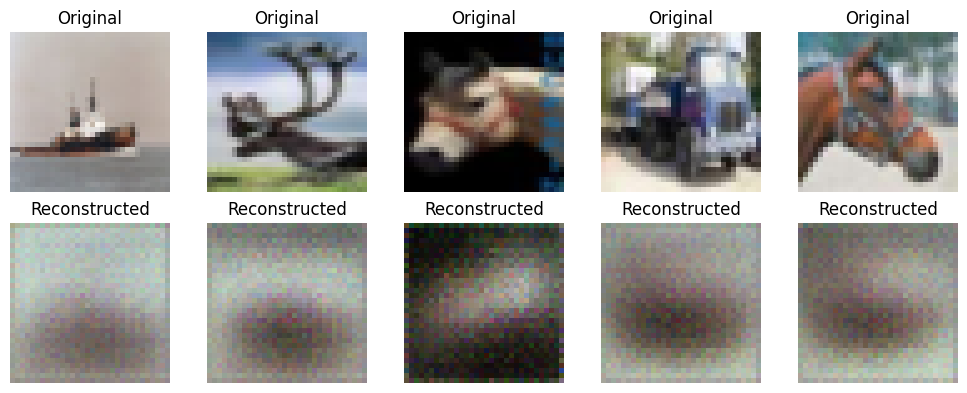

---------------------------------------------------------------------------------------------------
Epoch 2, Mean Test Loss: 8969.993983015229, Learning Rate: 0.000050, Time: 6.39s


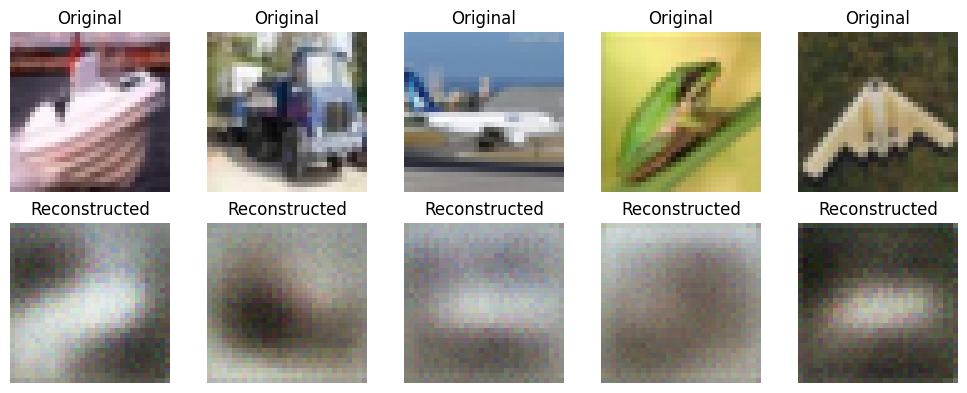

---------------------------------------------------------------------------------------------------
Epoch 3, Mean Test Loss: 7240.677667931665, Learning Rate: 0.000050, Time: 6.97s


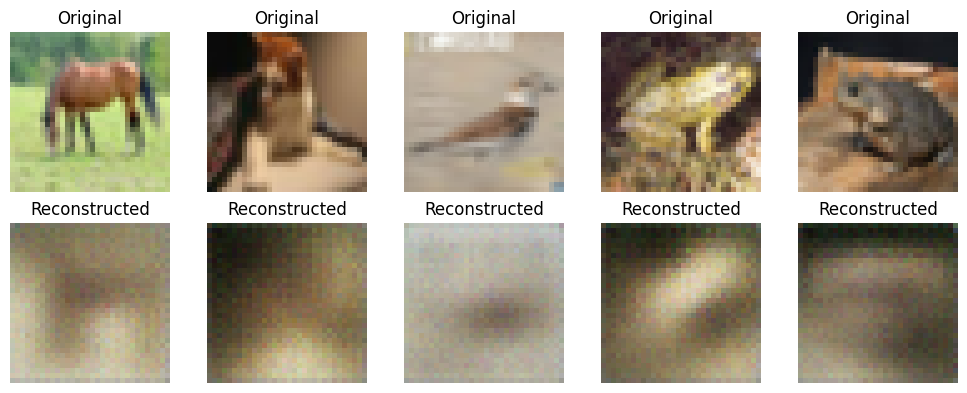

---------------------------------------------------------------------------------------------------
Epoch 4, Mean Test Loss: 6791.855595455894, Learning Rate: 0.000050, Time: 6.43s


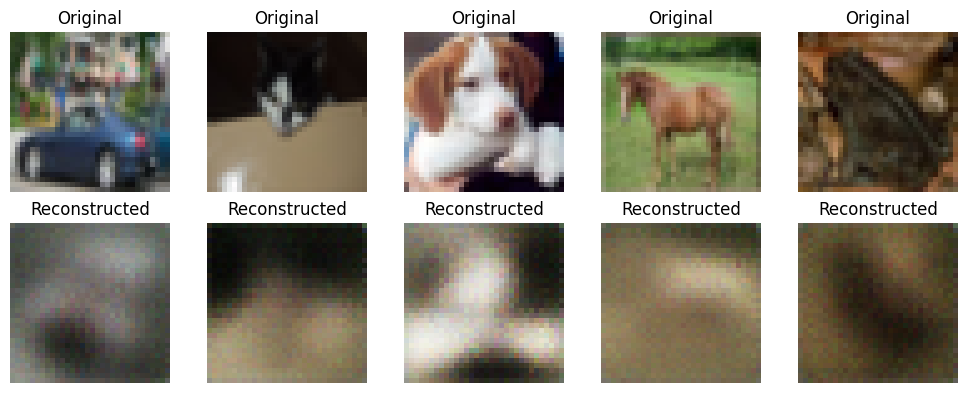

---------------------------------------------------------------------------------------------------
Epoch 5, Mean Test Loss: 6294.036465029173, Learning Rate: 0.000049, Time: 6.54s


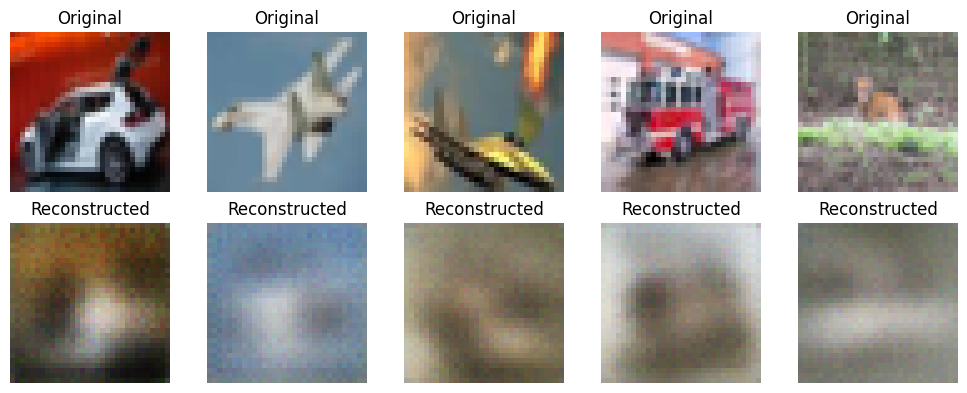

---------------------------------------------------------------------------------------------------
Epoch 6, Mean Test Loss: 5997.899395520174, Learning Rate: 0.000049, Time: 6.46s


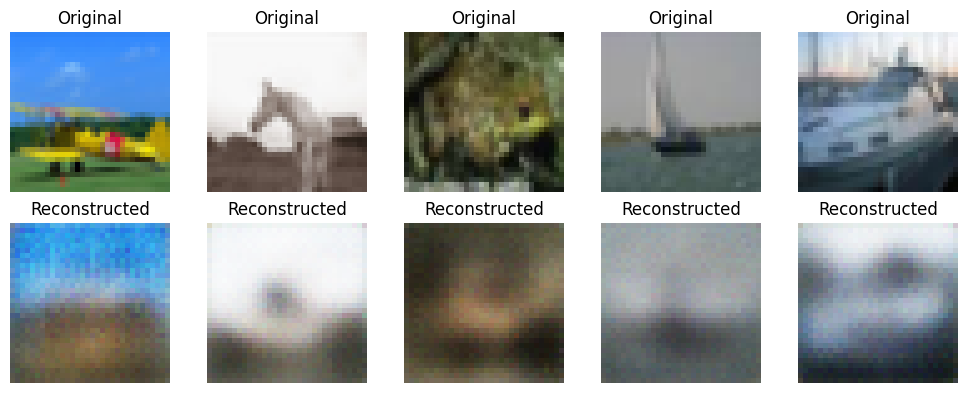

---------------------------------------------------------------------------------------------------
Epoch 7, Mean Test Loss: 5860.041153919848, Learning Rate: 0.000049, Time: 6.55s


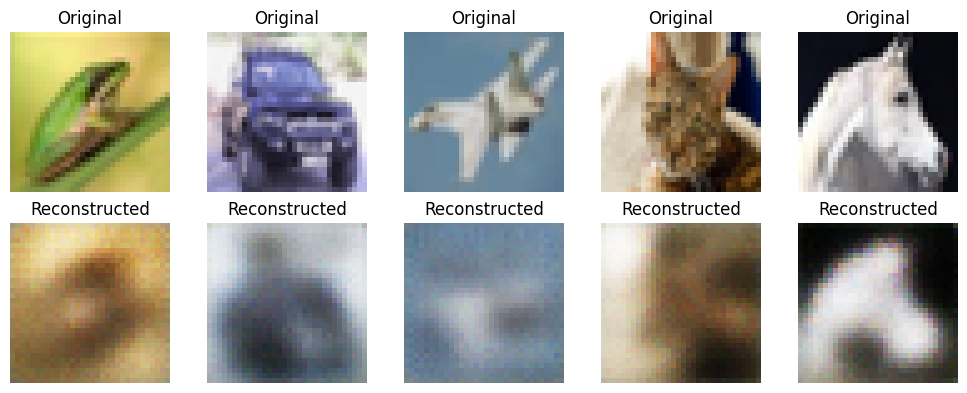

---------------------------------------------------------------------------------------------------
Epoch 8, Mean Test Loss: 5527.477327370945, Learning Rate: 0.000048, Time: 6.50s


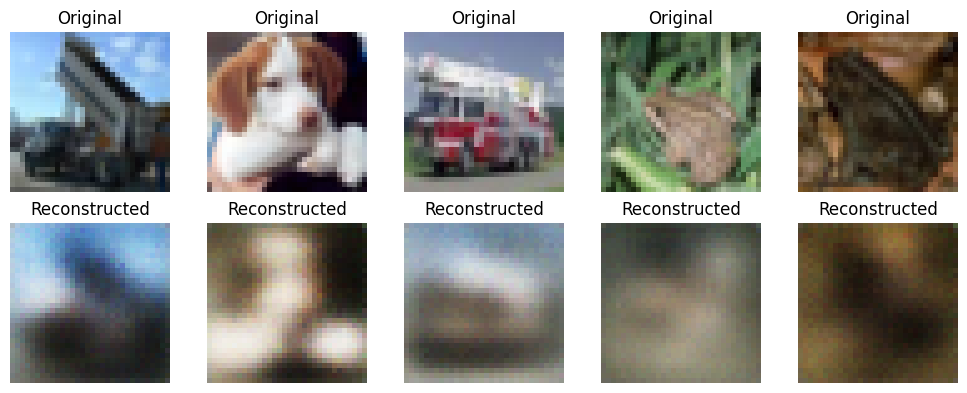

---------------------------------------------------------------------------------------------------
Epoch 9, Mean Test Loss: 5538.161088001879, Learning Rate: 0.000048, Time: 6.65s


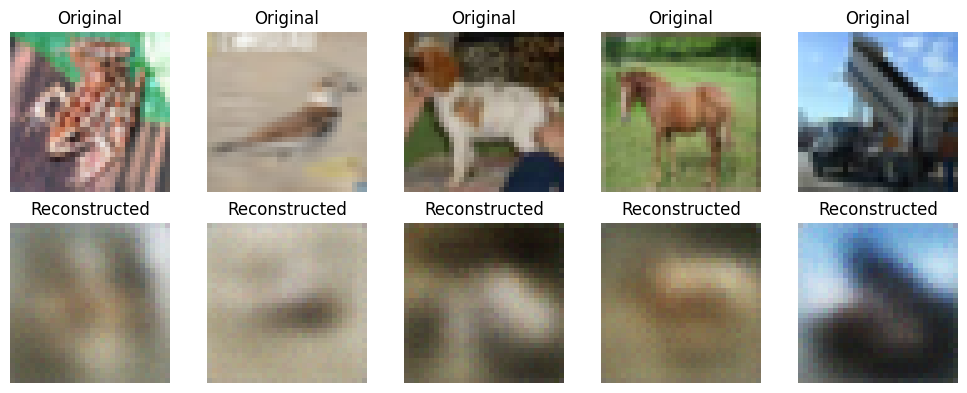

---------------------------------------------------------------------------------------------------
Epoch 10, Mean Test Loss: 5223.141117144234, Learning Rate: 0.000047, Time: 6.46s


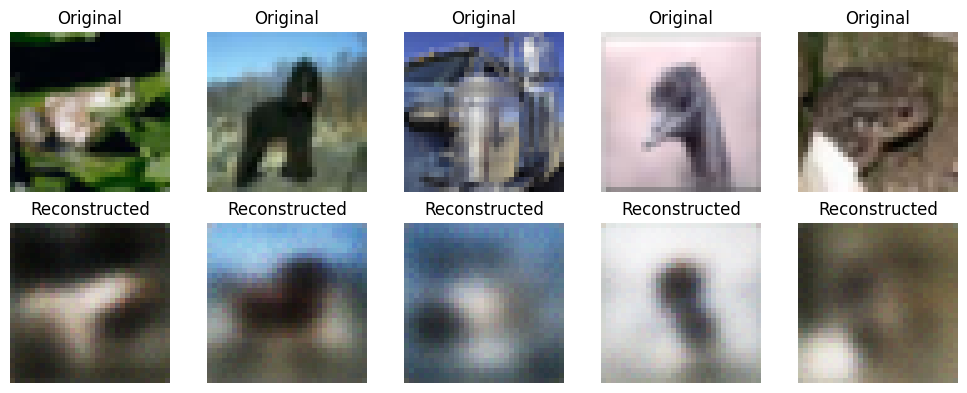

---------------------------------------------------------------------------------------------------
Epoch 11, Mean Test Loss: 4989.666296850277, Learning Rate: 0.000046, Time: 6.77s


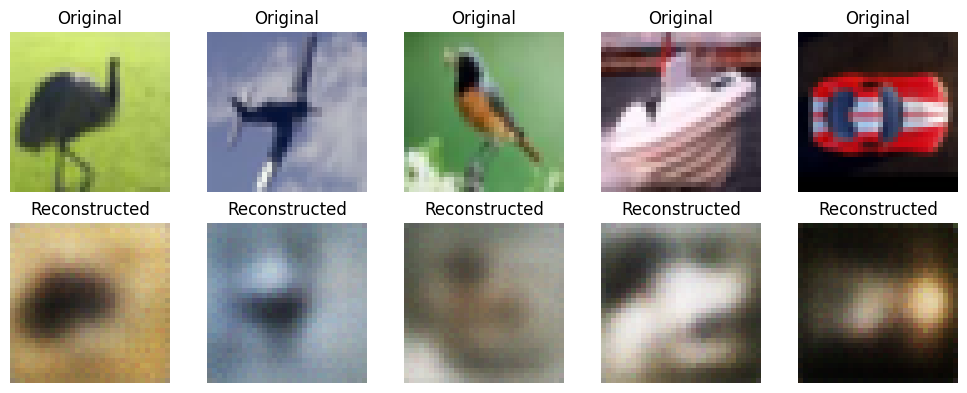

---------------------------------------------------------------------------------------------------
Epoch 12, Mean Test Loss: 5290.732123652591, Learning Rate: 0.000045, Time: 6.71s


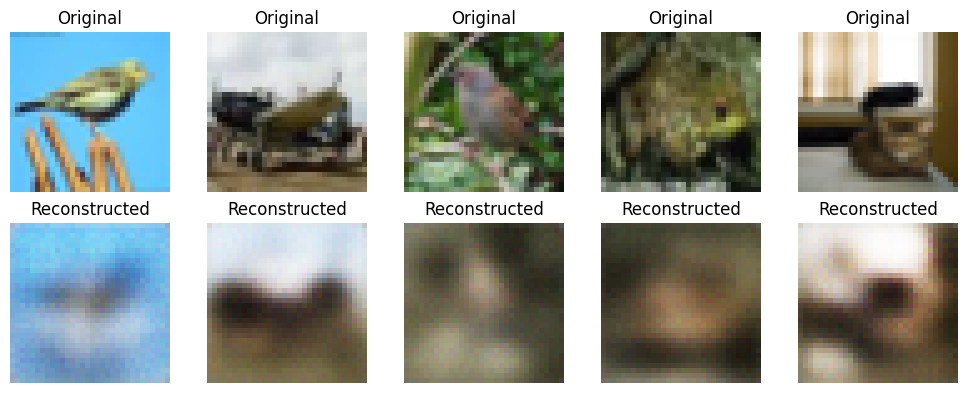

---------------------------------------------------------------------------------------------------
Epoch 13, Mean Test Loss: 4866.411624956734, Learning Rate: 0.000045, Time: 6.61s


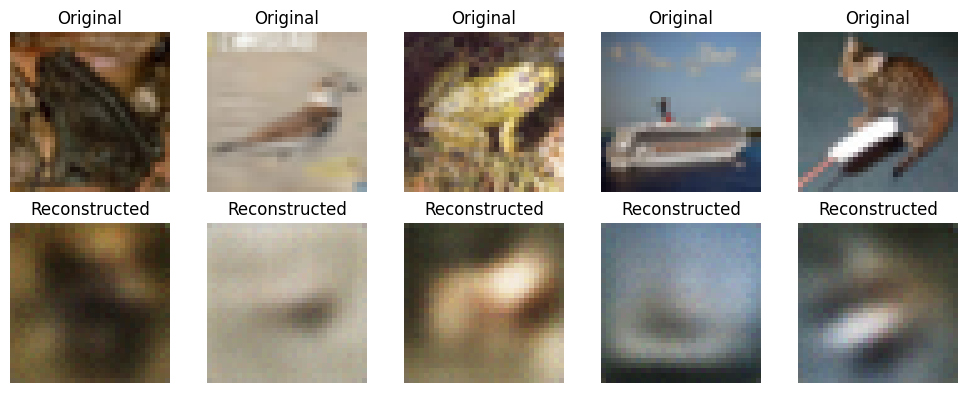

---------------------------------------------------------------------------------------------------
Epoch 14, Mean Test Loss: 4738.908828155904, Learning Rate: 0.000044, Time: 6.75s


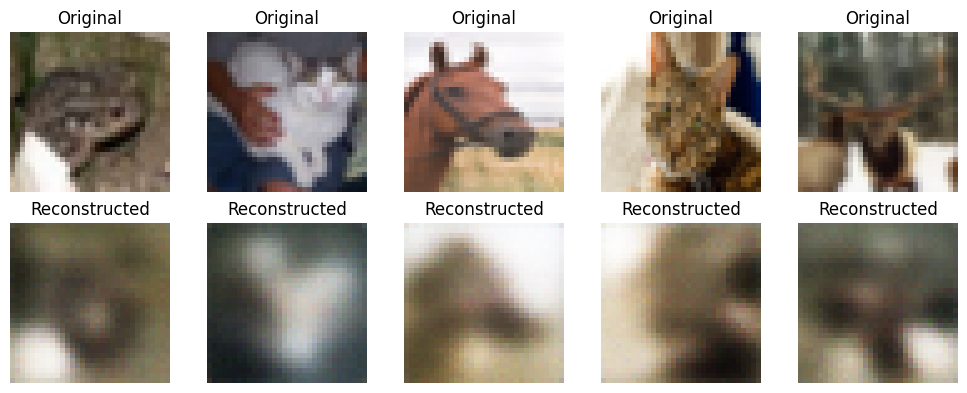

---------------------------------------------------------------------------------------------------
Epoch 15, Mean Test Loss: 4687.303934218008, Learning Rate: 0.000043, Time: 6.55s


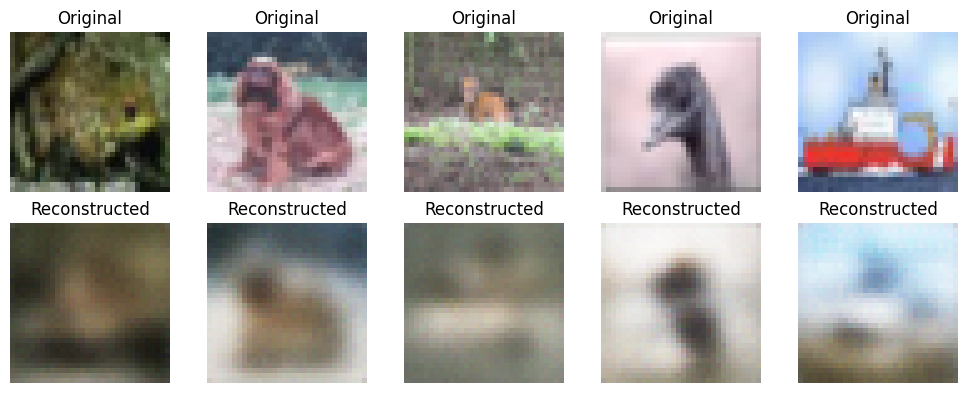

---------------------------------------------------------------------------------------------------
Epoch 16, Mean Test Loss: 4609.688517510136, Learning Rate: 0.000042, Time: 6.66s


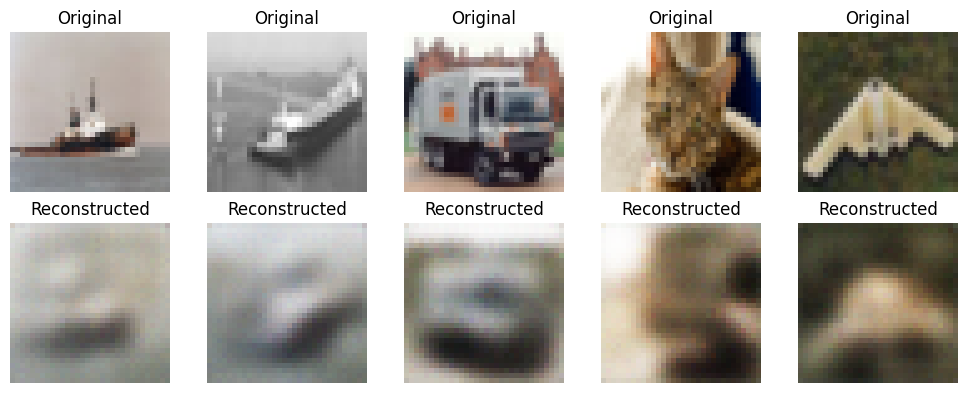

---------------------------------------------------------------------------------------------------
Epoch 17, Mean Test Loss: 4553.263752997676, Learning Rate: 0.000041, Time: 6.66s


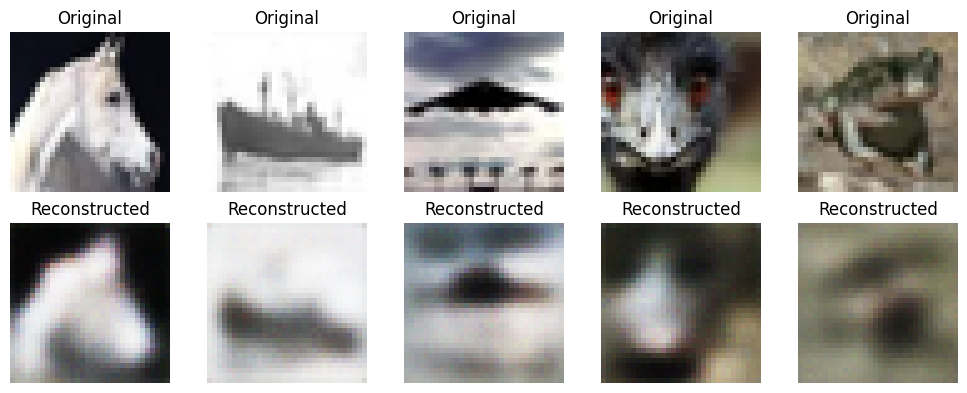

---------------------------------------------------------------------------------------------------
Epoch 18, Mean Test Loss: 4417.851656756824, Learning Rate: 0.000040, Time: 6.71s


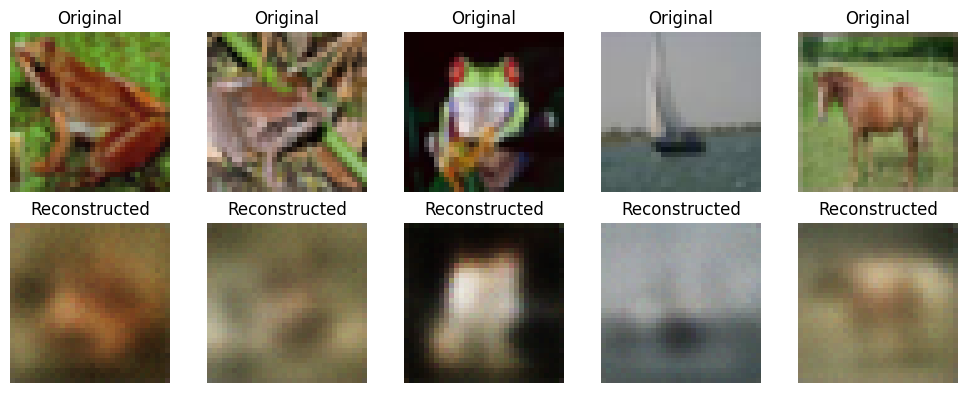

---------------------------------------------------------------------------------------------------
Epoch 19, Mean Test Loss: 4357.018872224832, Learning Rate: 0.000039, Time: 6.77s


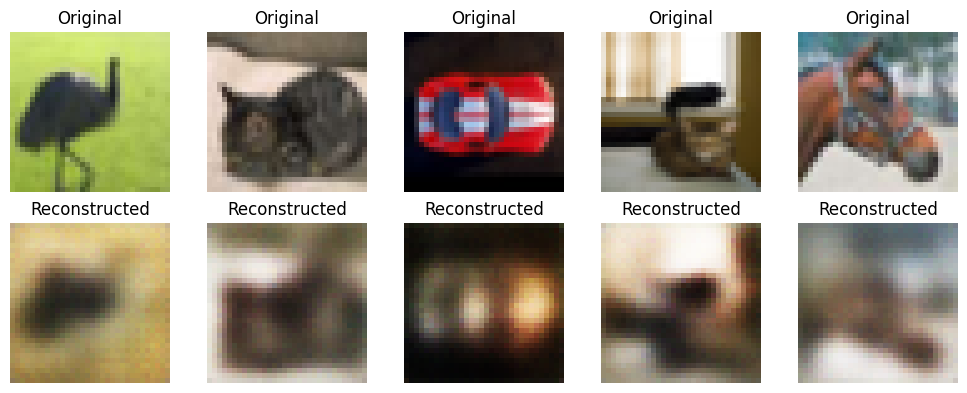

---------------------------------------------------------------------------------------------------
Epoch 20, Mean Test Loss: 4417.449405718453, Learning Rate: 0.000037, Time: 6.61s


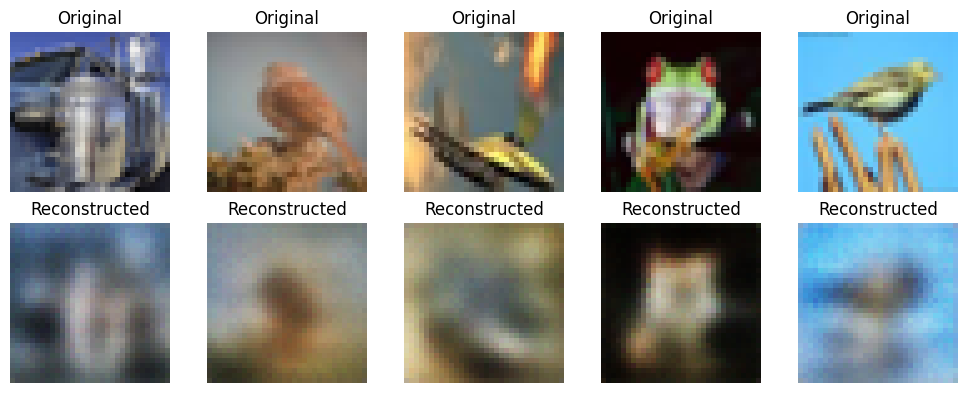

---------------------------------------------------------------------------------------------------
Epoch 21, Mean Test Loss: 4286.785851587223, Learning Rate: 0.000036, Time: 6.49s


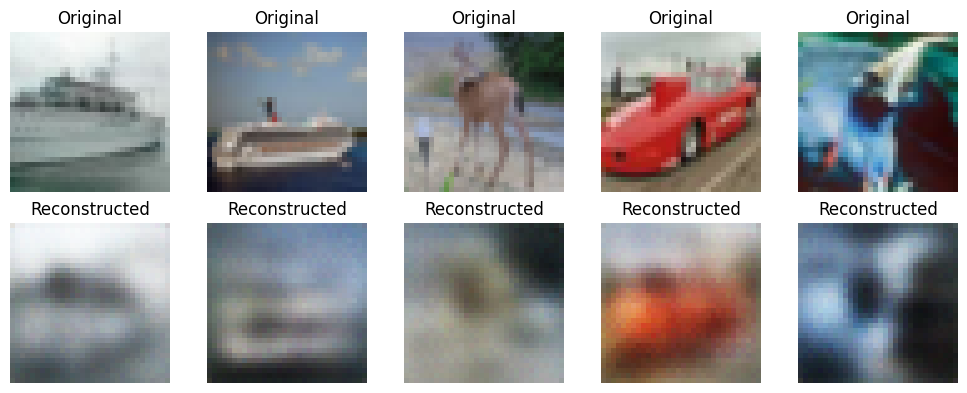

---------------------------------------------------------------------------------------------------
Epoch 22, Mean Test Loss: 4237.347580535502, Learning Rate: 0.000035, Time: 6.64s


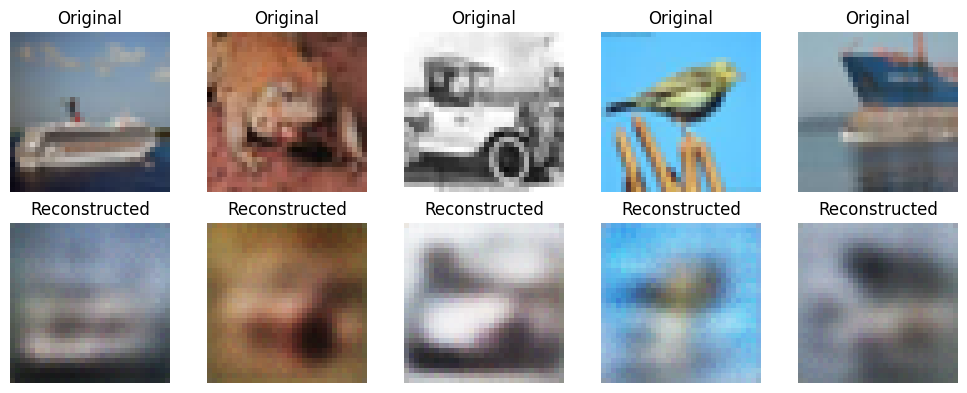

---------------------------------------------------------------------------------------------------
Epoch 23, Mean Test Loss: 4207.840356754351, Learning Rate: 0.000034, Time: 6.70s


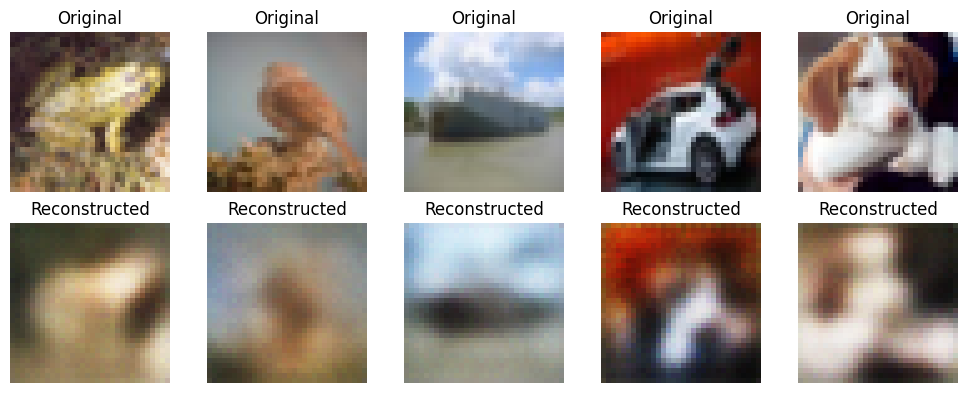

---------------------------------------------------------------------------------------------------
Epoch 24, Mean Test Loss: 4285.036473527739, Learning Rate: 0.000033, Time: 6.66s


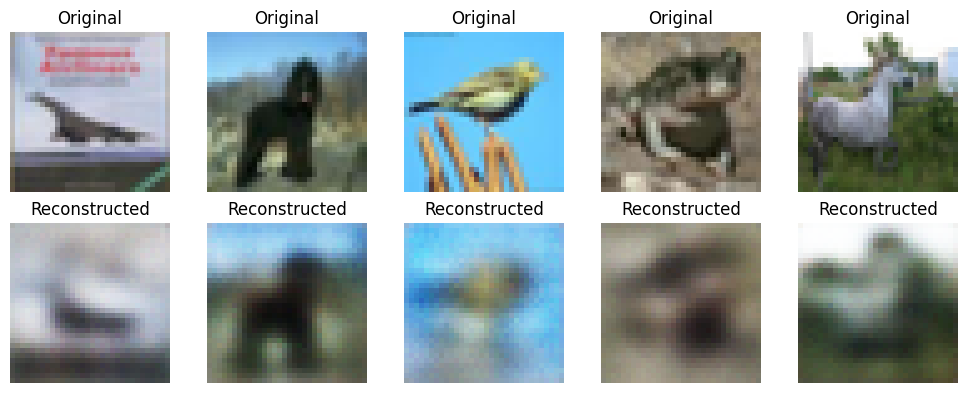

---------------------------------------------------------------------------------------------------
Epoch 25, Mean Test Loss: 3991.744292053995, Learning Rate: 0.000031, Time: 6.60s


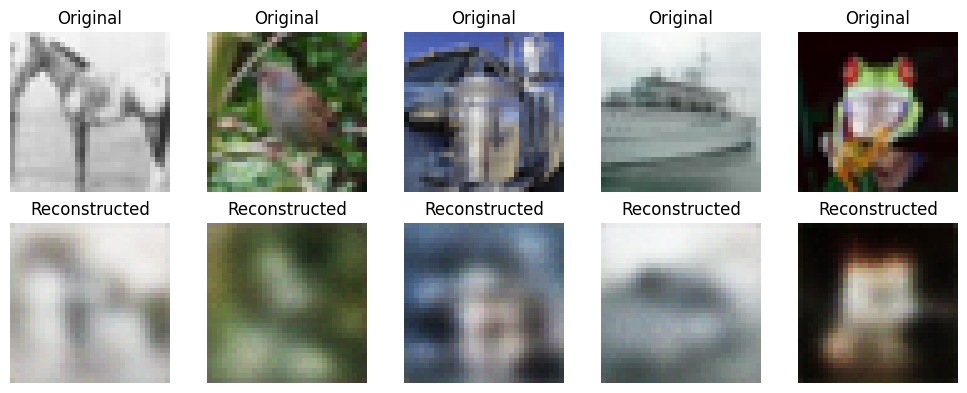

---------------------------------------------------------------------------------------------------
Epoch 26, Mean Test Loss: 3967.1478163320808, Learning Rate: 0.000030, Time: 6.94s


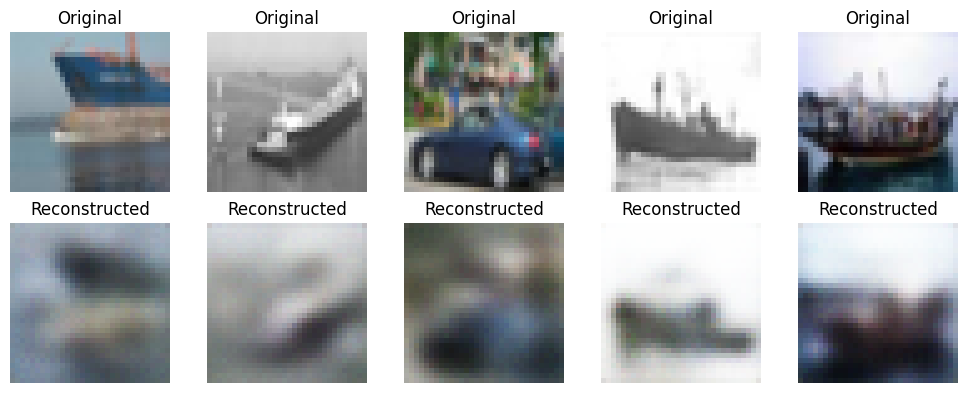

---------------------------------------------------------------------------------------------------
Epoch 27, Mean Test Loss: 3949.8958462099486, Learning Rate: 0.000029, Time: 6.58s


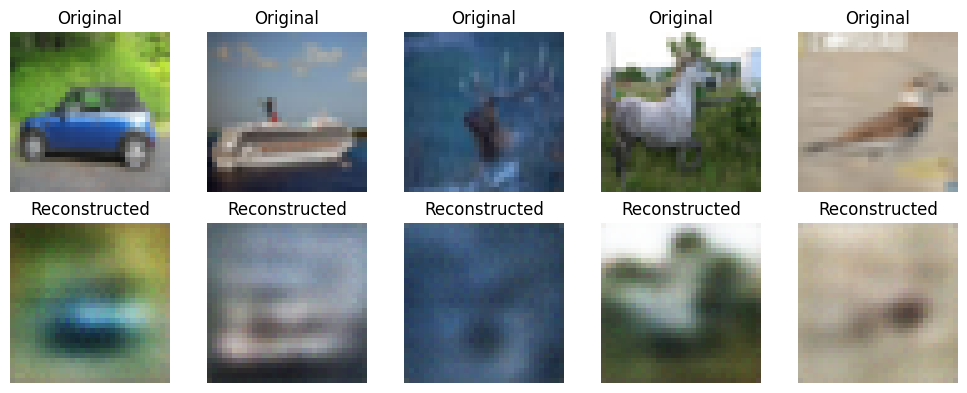

---------------------------------------------------------------------------------------------------
Epoch 28, Mean Test Loss: 3929.1492178228837, Learning Rate: 0.000027, Time: 6.65s


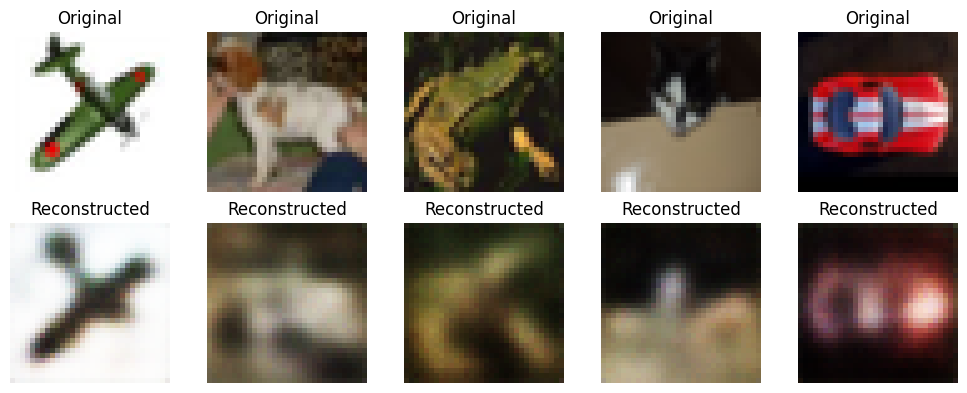

---------------------------------------------------------------------------------------------------
Epoch 29, Mean Test Loss: 3875.804152090338, Learning Rate: 0.000026, Time: 6.40s


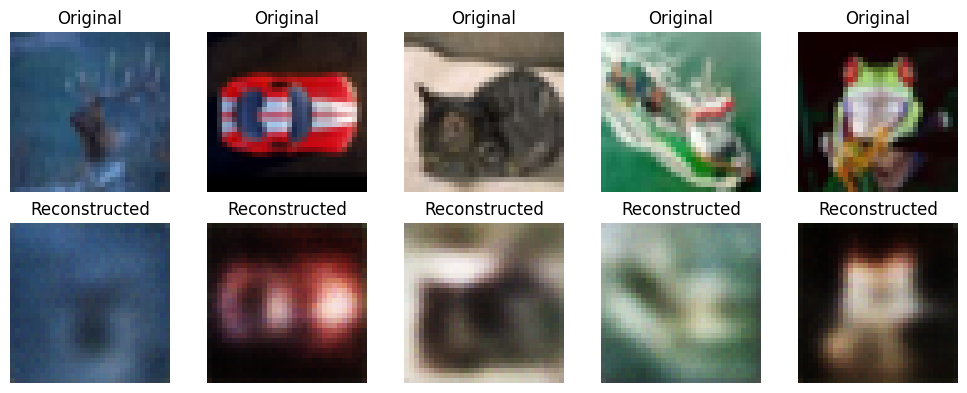

---------------------------------------------------------------------------------------------------
Epoch 30, Mean Test Loss: 3968.4945369672173, Learning Rate: 0.000025, Time: 6.63s


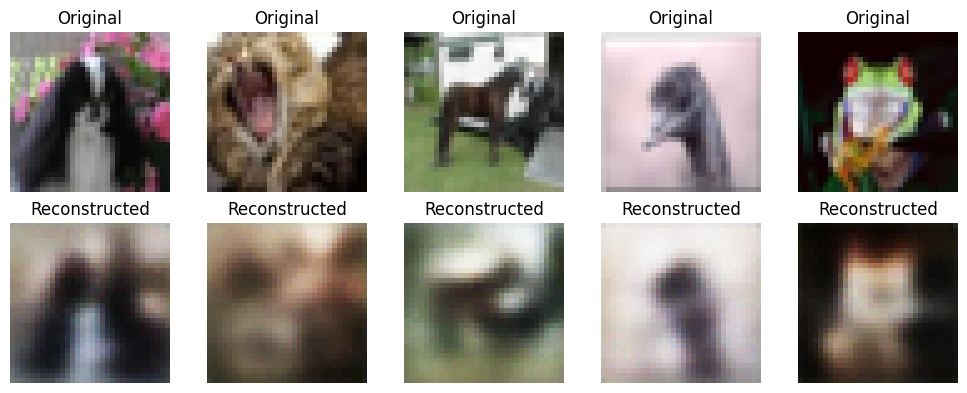

---------------------------------------------------------------------------------------------------
Epoch 31, Mean Test Loss: 3791.8923185324365, Learning Rate: 0.000024, Time: 6.70s


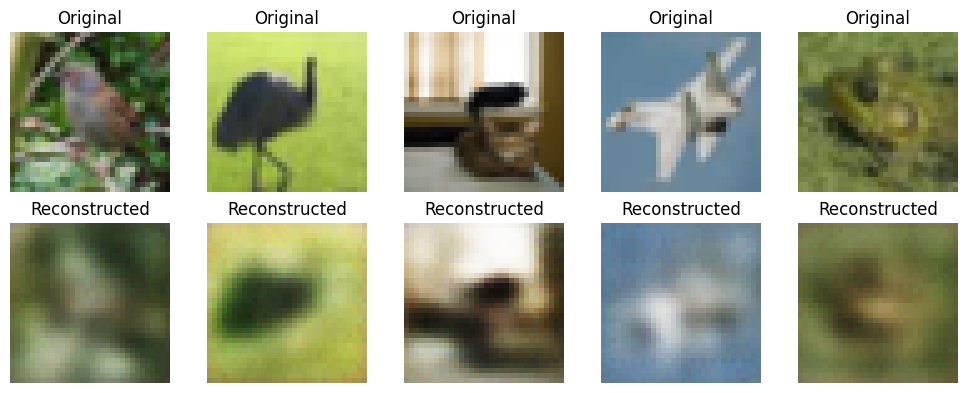

---------------------------------------------------------------------------------------------------
Epoch 32, Mean Test Loss: 3826.265119721618, Learning Rate: 0.000023, Time: 6.46s


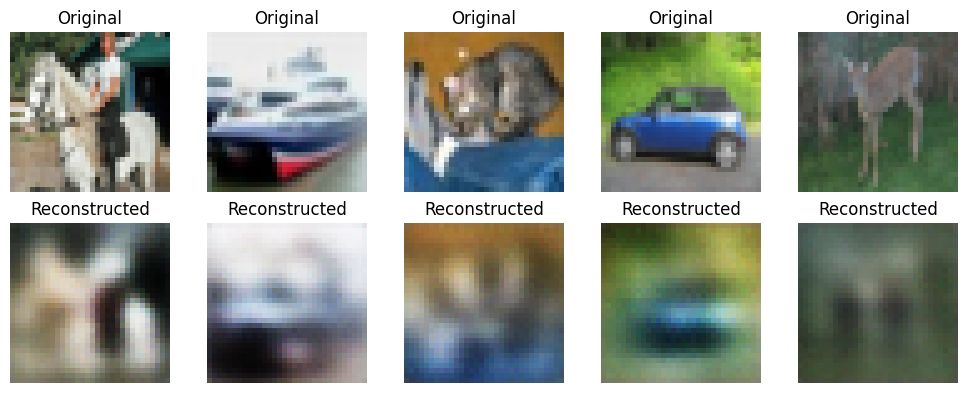

---------------------------------------------------------------------------------------------------
Epoch 33, Mean Test Loss: 3701.2008620636375, Learning Rate: 0.000021, Time: 6.74s


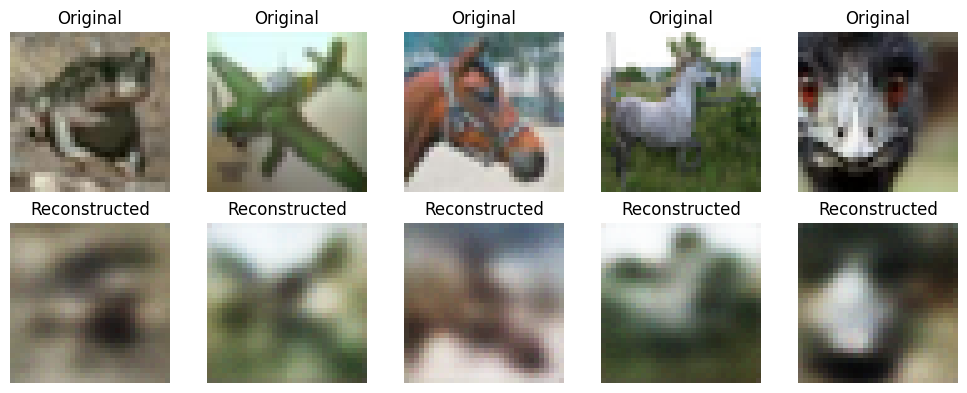

---------------------------------------------------------------------------------------------------
Epoch 34, Mean Test Loss: 3741.457805392108, Learning Rate: 0.000020, Time: 6.43s


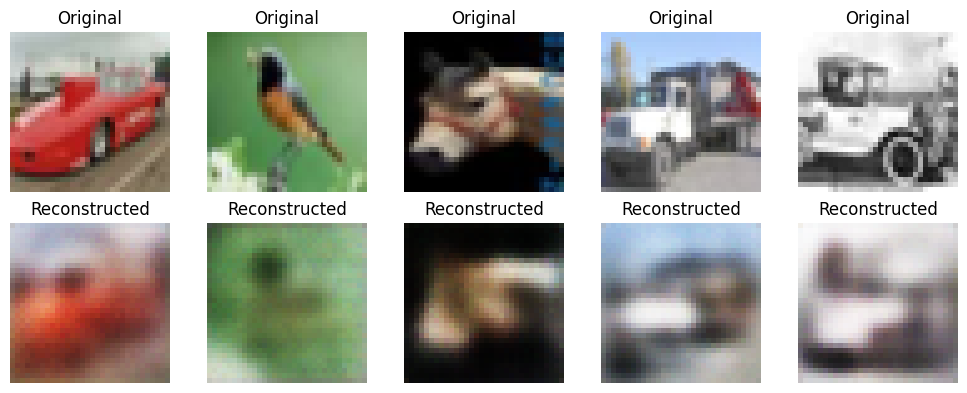

---------------------------------------------------------------------------------------------------
Epoch 35, Mean Test Loss: 3723.6478541893293, Learning Rate: 0.000019, Time: 6.59s


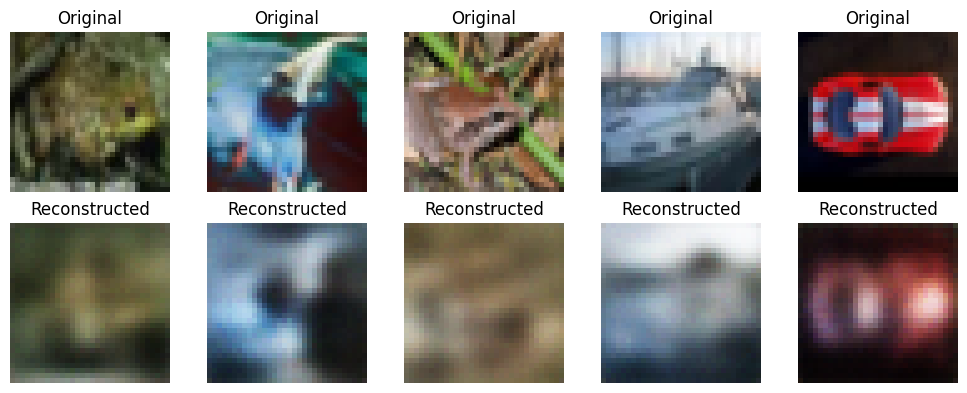

---------------------------------------------------------------------------------------------------
Epoch 36, Mean Test Loss: 3681.043681856952, Learning Rate: 0.000018, Time: 6.64s


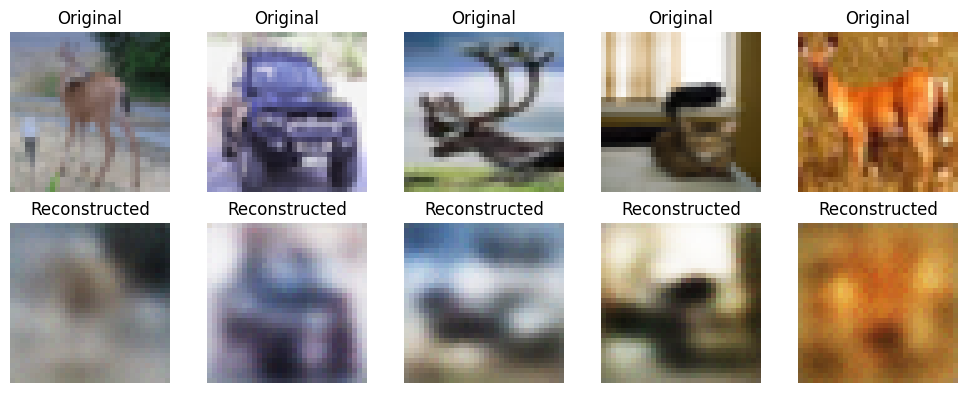

---------------------------------------------------------------------------------------------------
Epoch 37, Mean Test Loss: 3693.4651095233385, Learning Rate: 0.000017, Time: 6.42s


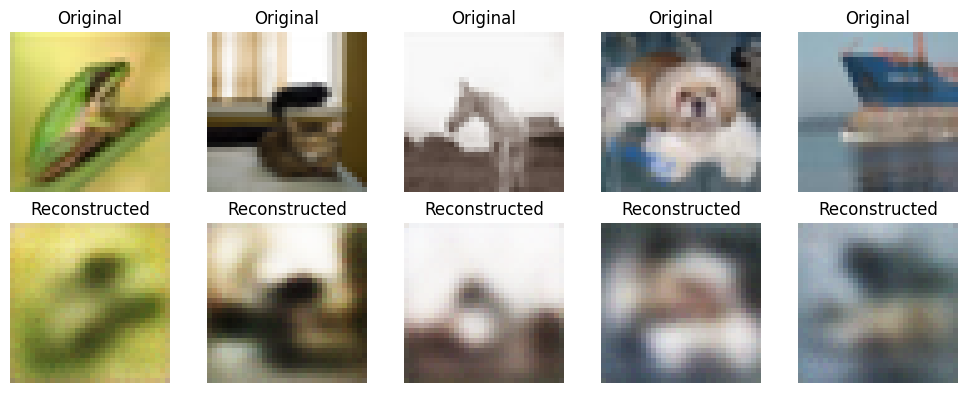

---------------------------------------------------------------------------------------------------
Epoch 38, Mean Test Loss: 3613.246051643468, Learning Rate: 0.000016, Time: 6.92s


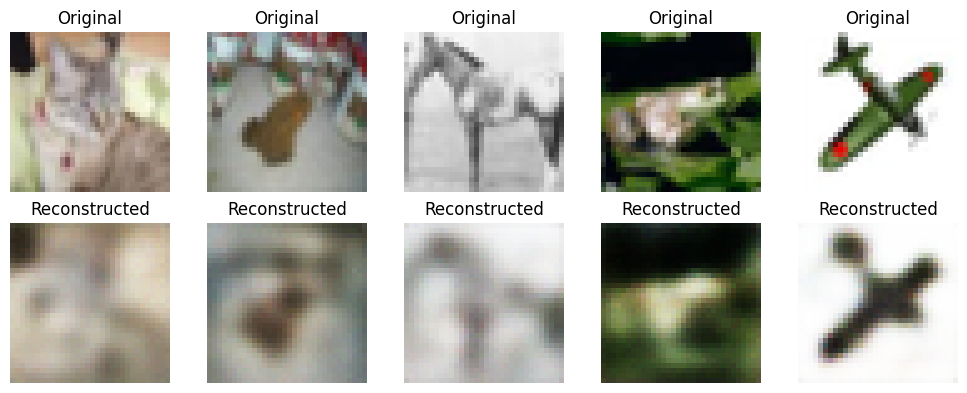

---------------------------------------------------------------------------------------------------
Epoch 39, Mean Test Loss: 3614.5775447797173, Learning Rate: 0.000015, Time: 6.41s


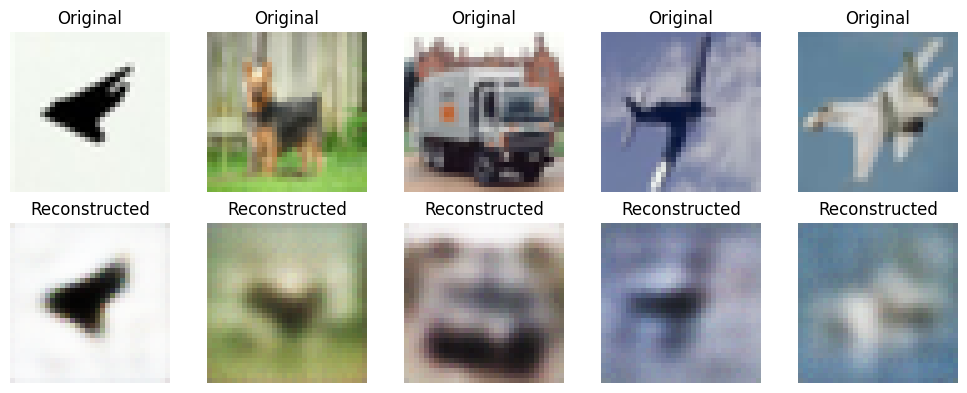

---------------------------------------------------------------------------------------------------
Epoch 40, Mean Test Loss: 3581.139078260977, Learning Rate: 0.000015, Time: 6.47s


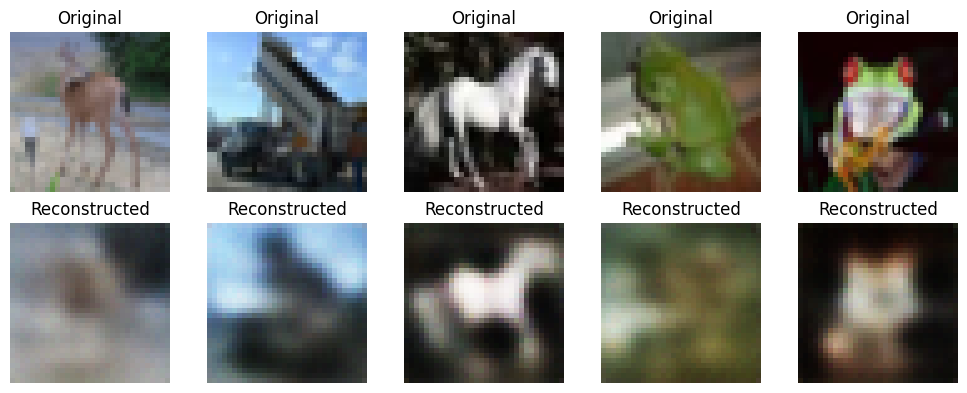

---------------------------------------------------------------------------------------------------
Epoch 41, Mean Test Loss: 3557.7833719374257, Learning Rate: 0.000014, Time: 7.33s


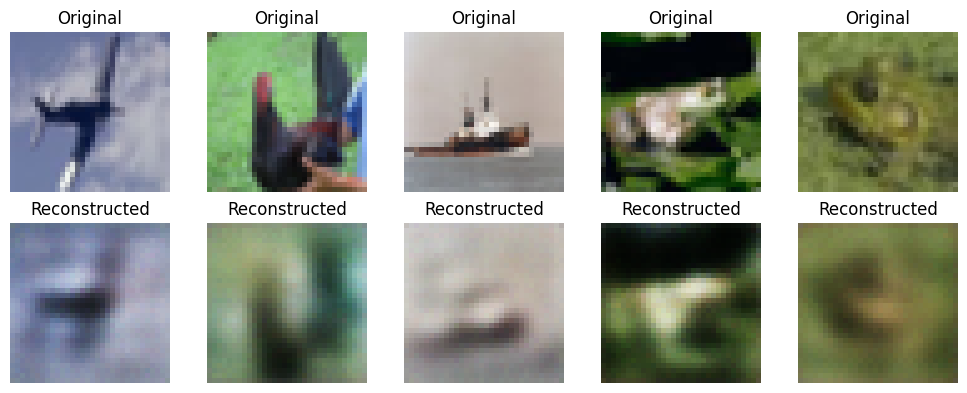

---------------------------------------------------------------------------------------------------
Epoch 42, Mean Test Loss: 3556.243605987935, Learning Rate: 0.000013, Time: 6.70s


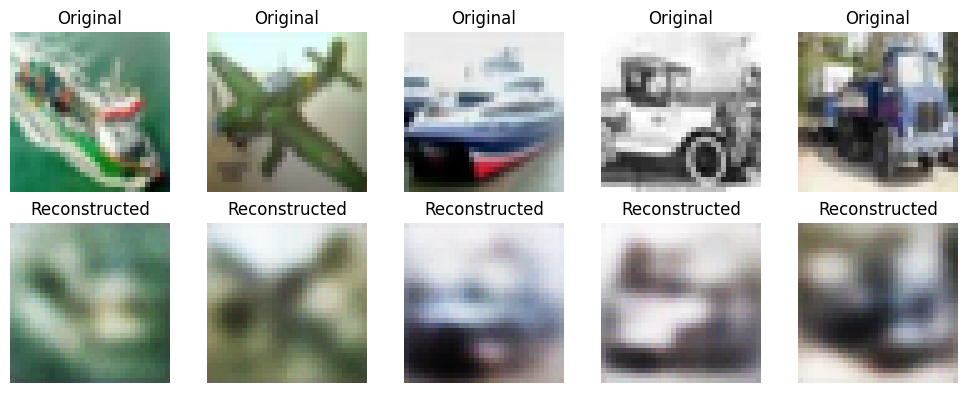

---------------------------------------------------------------------------------------------------
Epoch 43, Mean Test Loss: 3607.421029392677, Learning Rate: 0.000012, Time: 6.48s


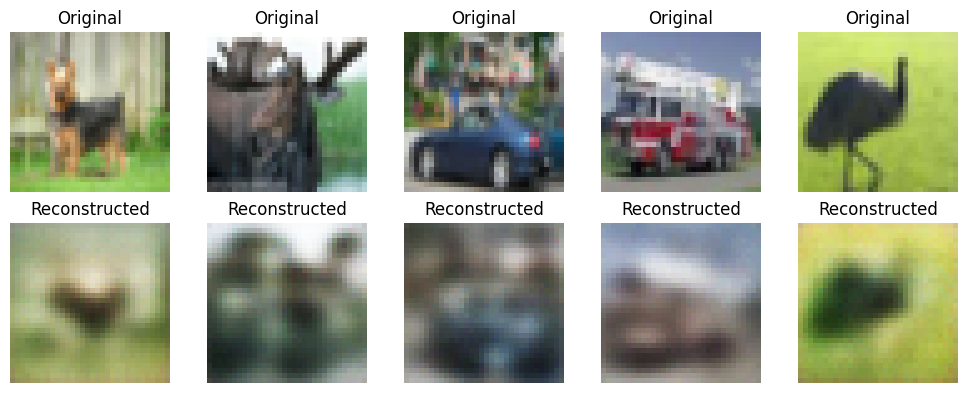

---------------------------------------------------------------------------------------------------
Epoch 44, Mean Test Loss: 3523.9674647850325, Learning Rate: 0.000012, Time: 7.02s


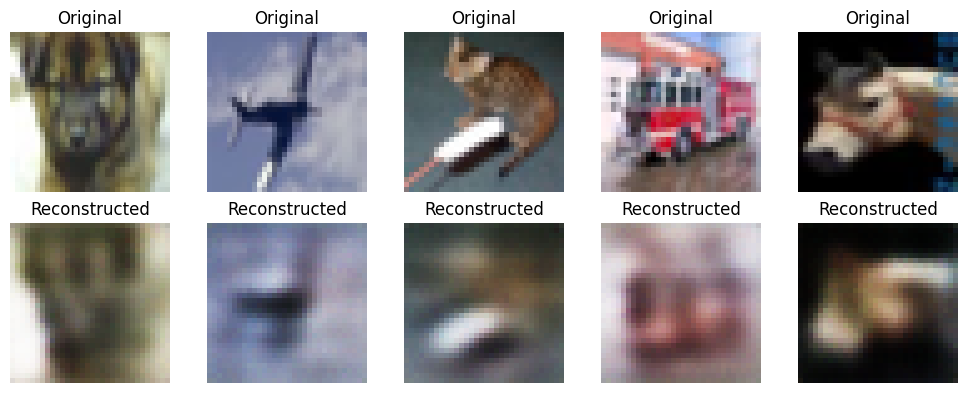

---------------------------------------------------------------------------------------------------
Epoch 45, Mean Test Loss: 3501.938135074664, Learning Rate: 0.000011, Time: 6.51s


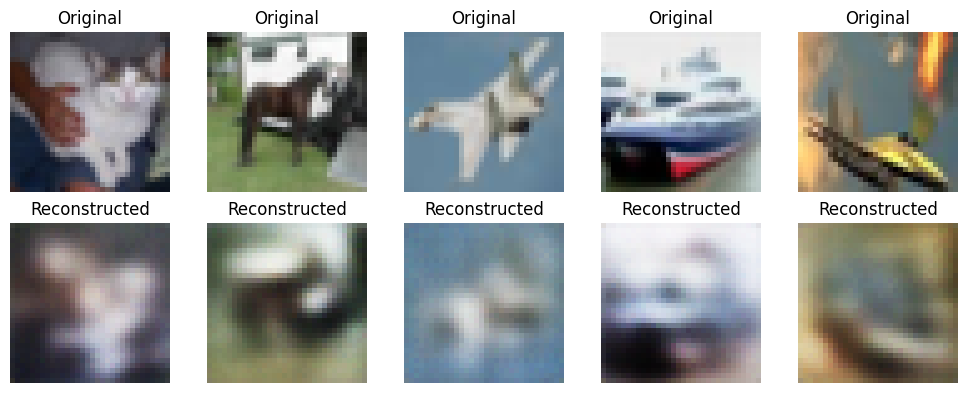

---------------------------------------------------------------------------------------------------
Epoch 46, Mean Test Loss: 3504.2633102996438, Learning Rate: 0.000011, Time: 6.50s


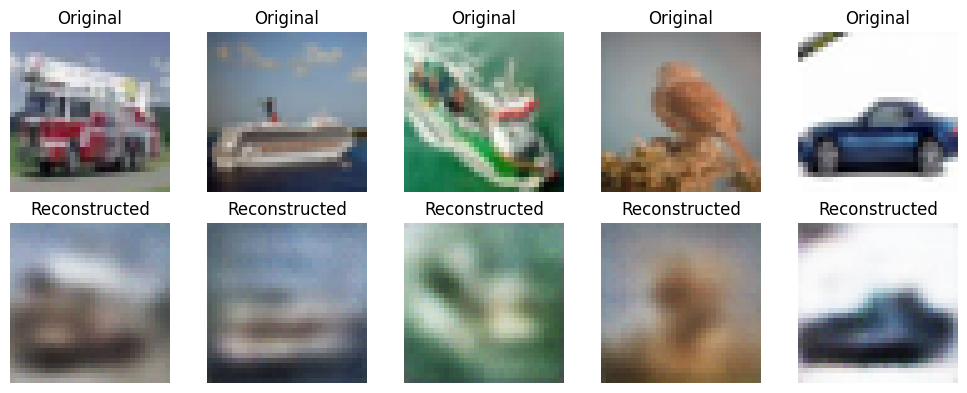

---------------------------------------------------------------------------------------------------
Epoch 47, Mean Test Loss: 3481.9601768783377, Learning Rate: 0.000011, Time: 6.90s


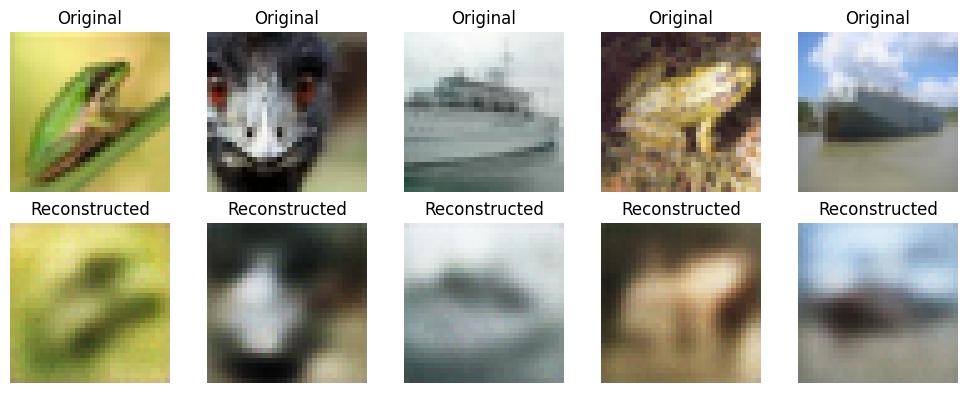

---------------------------------------------------------------------------------------------------
Epoch 48, Mean Test Loss: 3484.230212634123, Learning Rate: 0.000010, Time: 6.48s


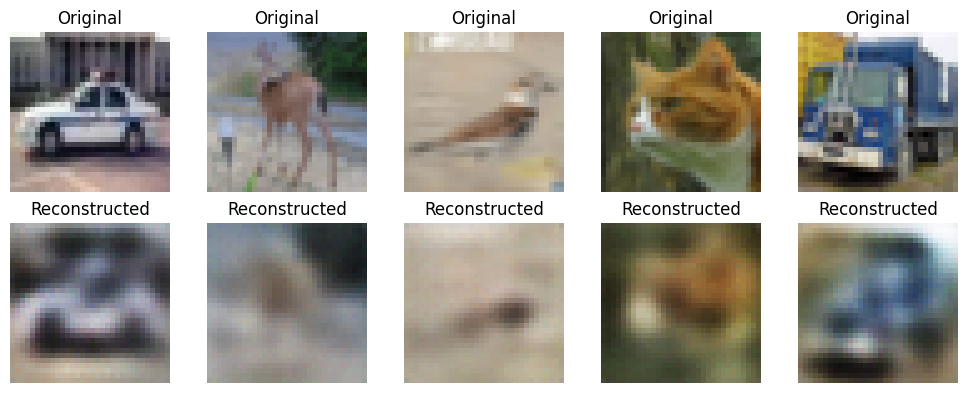

---------------------------------------------------------------------------------------------------
Epoch 49, Mean Test Loss: 3445.156151880192, Learning Rate: 0.000010, Time: 6.72s


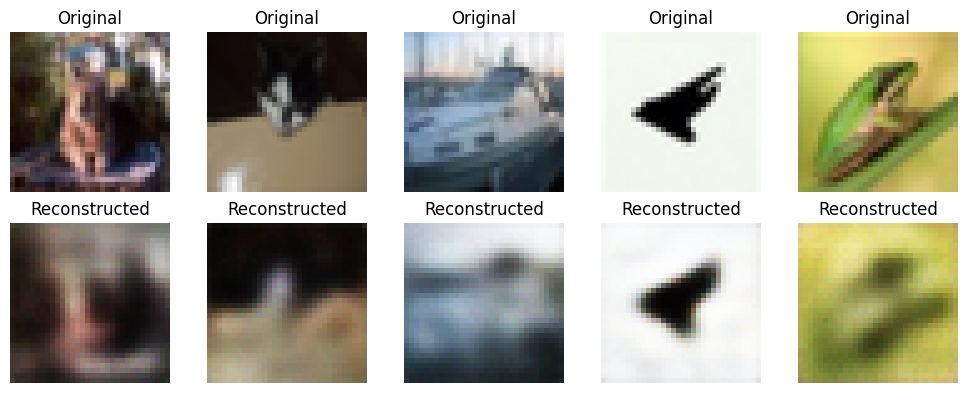

---------------------------------------------------------------------------------------------------
Epoch 50, Mean Test Loss: 3440.523682413222, Learning Rate: 0.000010, Time: 7.18s


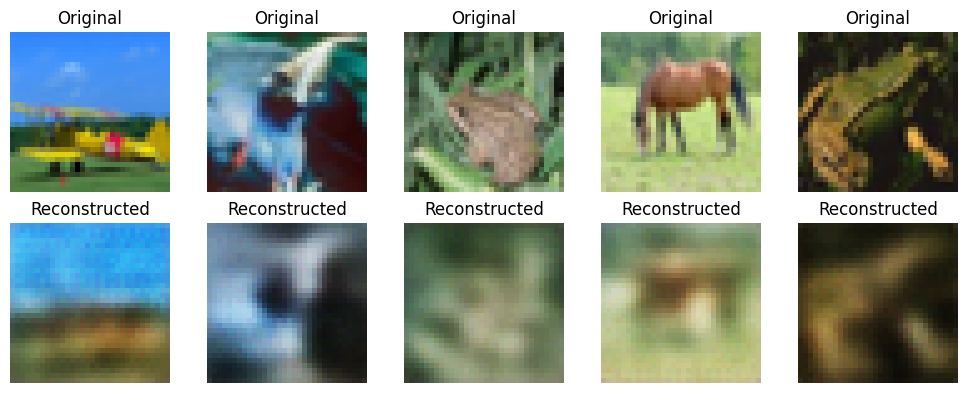

---------------------------------------------------------------------------------------------------
Epoch 51, Mean Test Loss: 3441.4185087952433, Learning Rate: 0.000010, Time: 6.74s


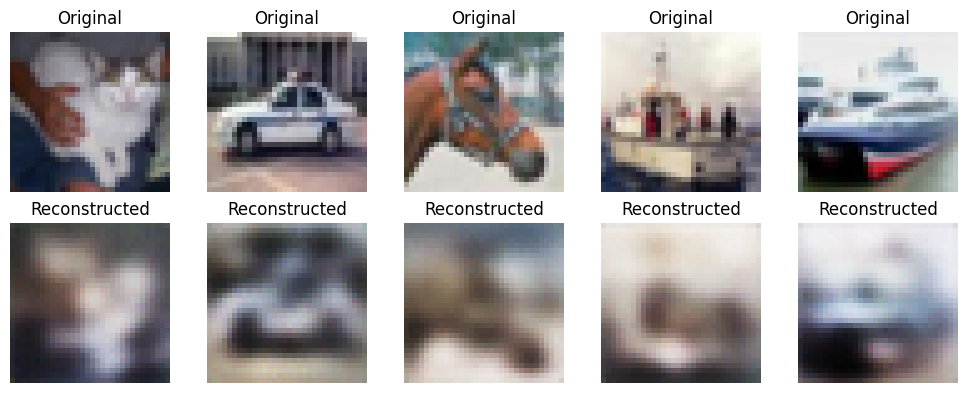

---------------------------------------------------------------------------------------------------
Epoch 52, Mean Test Loss: 3425.633953625643, Learning Rate: 0.000010, Time: 6.95s


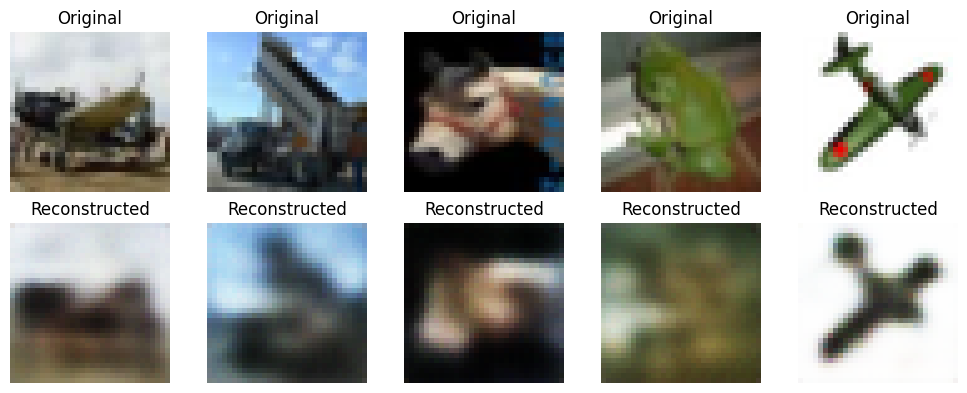

---------------------------------------------------------------------------------------------------
Epoch 53, Mean Test Loss: 3412.3310110357743, Learning Rate: 0.000010, Time: 6.85s


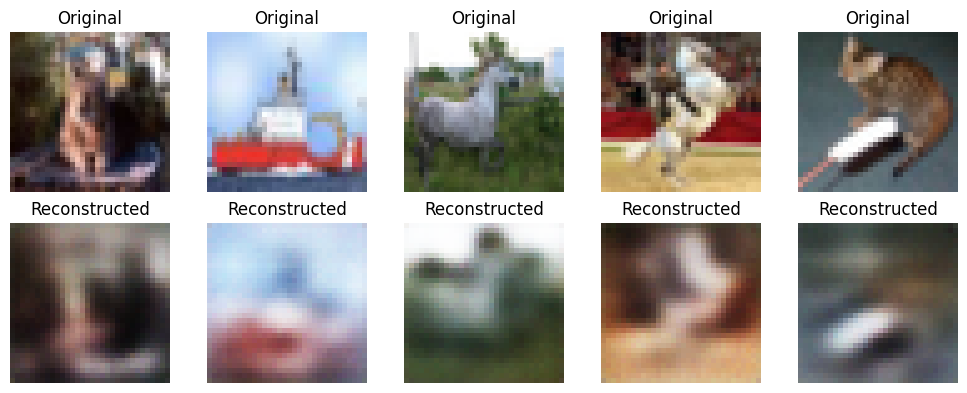

---------------------------------------------------------------------------------------------------
Epoch 54, Mean Test Loss: 3415.216494403308, Learning Rate: 0.000010, Time: 6.64s


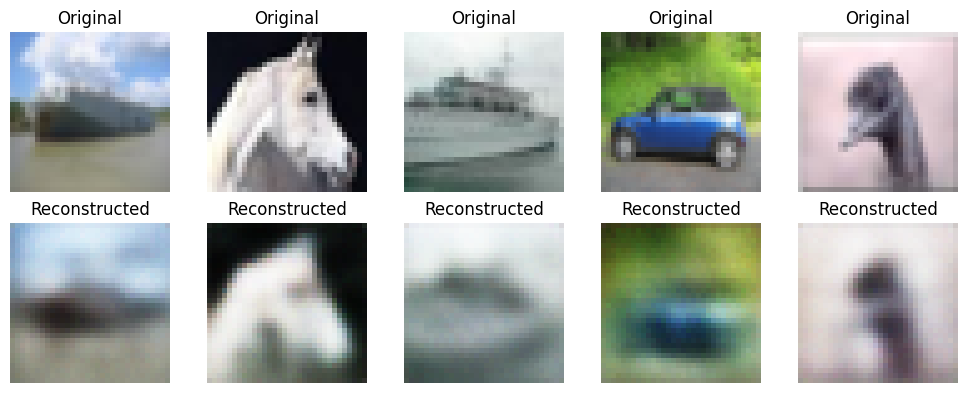

---------------------------------------------------------------------------------------------------
Epoch 55, Mean Test Loss: 3397.816071715536, Learning Rate: 0.000011, Time: 6.61s


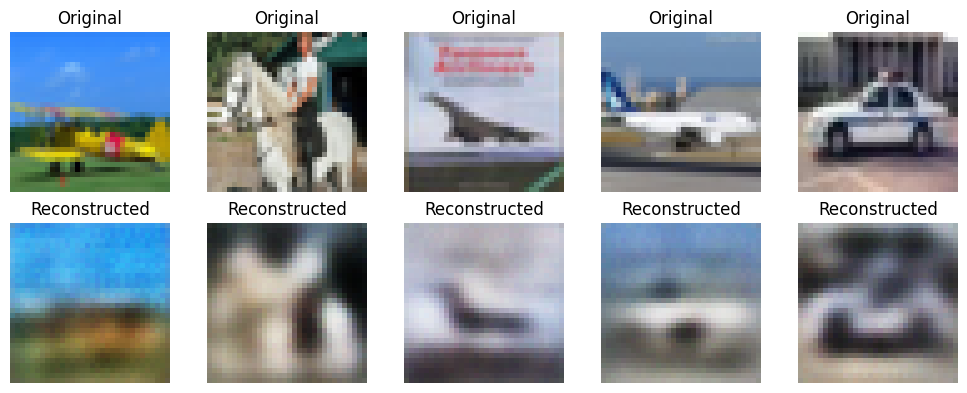

---------------------------------------------------------------------------------------------------
Epoch 56, Mean Test Loss: 3376.6136401212666, Learning Rate: 0.000011, Time: 6.91s


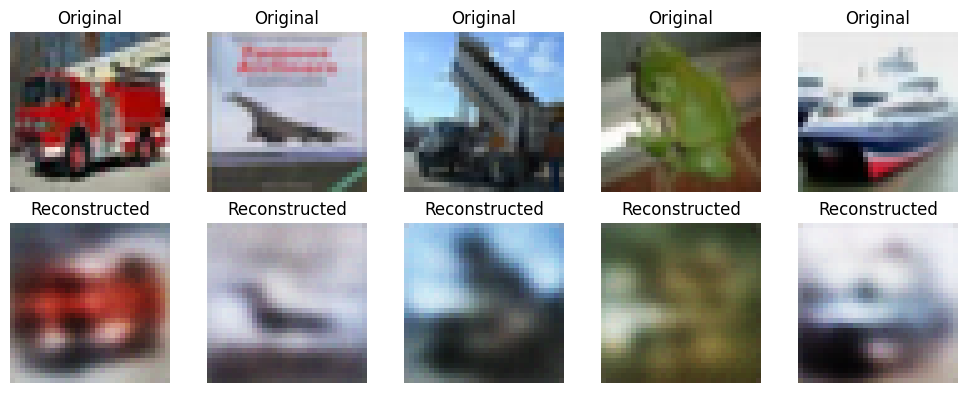

---------------------------------------------------------------------------------------------------
Epoch 57, Mean Test Loss: 3385.907775492608, Learning Rate: 0.000011, Time: 6.46s


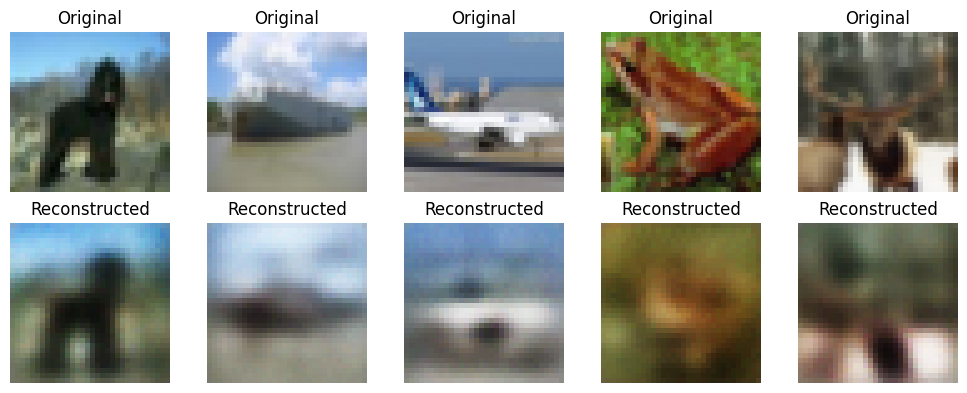

---------------------------------------------------------------------------------------------------
Epoch 58, Mean Test Loss: 3396.809791275218, Learning Rate: 0.000012, Time: 6.69s


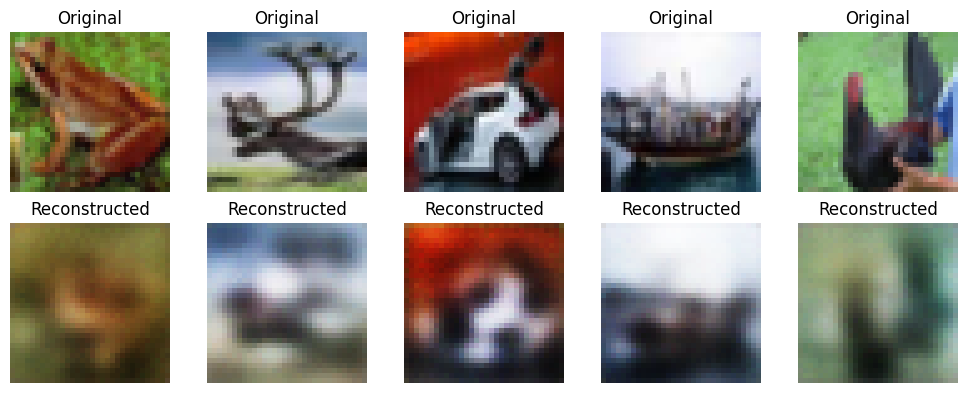

---------------------------------------------------------------------------------------------------
Epoch 59, Mean Test Loss: 3390.9652165280113, Learning Rate: 0.000012, Time: 6.86s


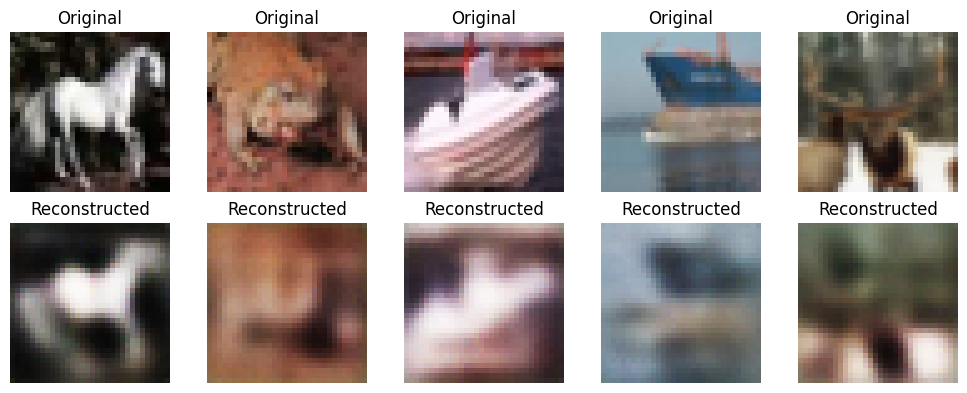

---------------------------------------------------------------------------------------------------
Epoch 60, Mean Test Loss: 3405.7716342588014, Learning Rate: 0.000013, Time: 6.73s


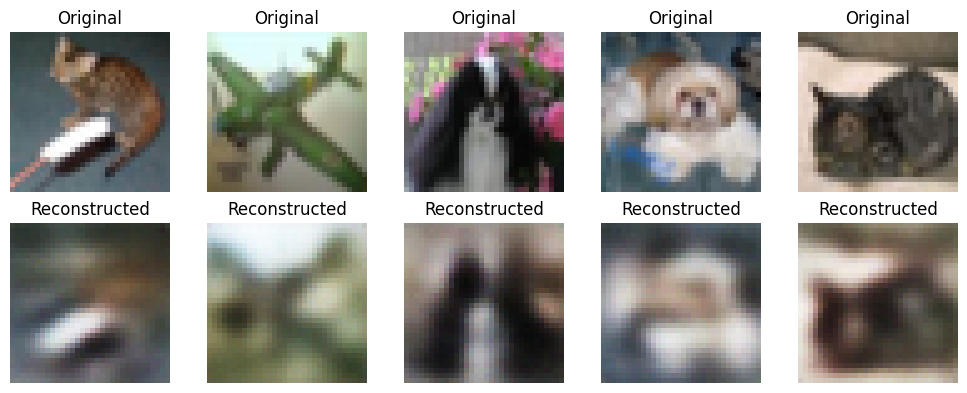

---------------------------------------------------------------------------------------------------
Epoch 61, Mean Test Loss: 3396.2264296133308, Learning Rate: 0.000014, Time: 6.98s


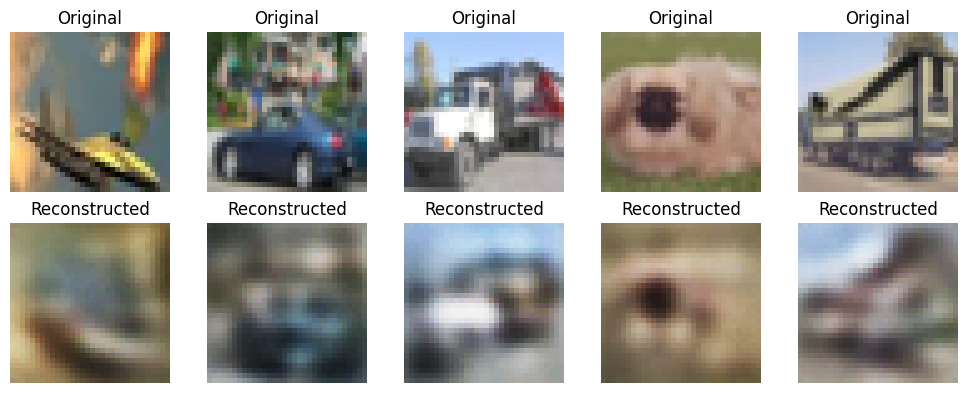

---------------------------------------------------------------------------------------------------
Epoch 62, Mean Test Loss: 3354.038335100005, Learning Rate: 0.000015, Time: 6.50s


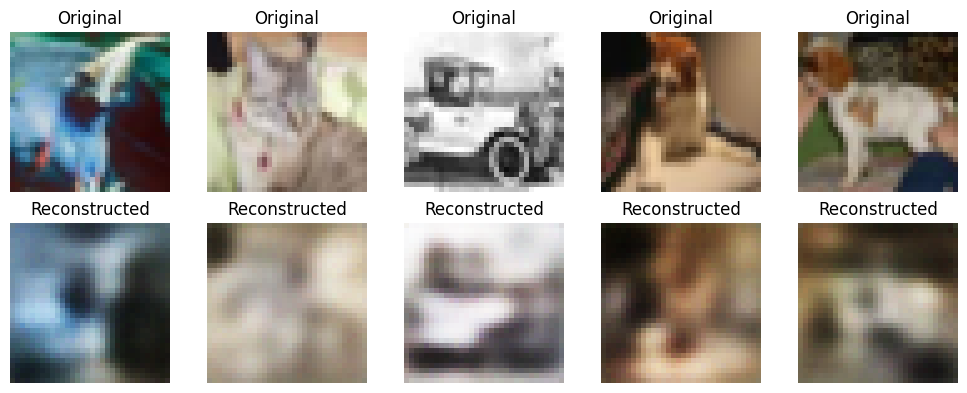

---------------------------------------------------------------------------------------------------
Epoch 63, Mean Test Loss: 3440.33333075801, Learning Rate: 0.000015, Time: 6.91s


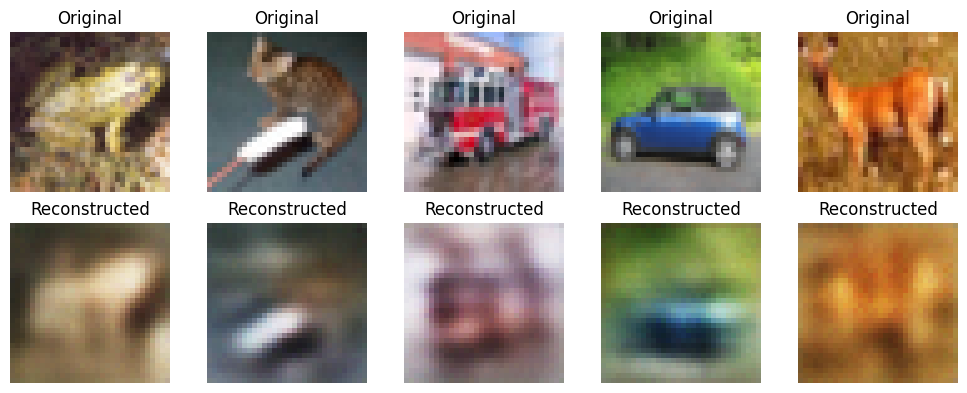

---------------------------------------------------------------------------------------------------
Epoch 64, Mean Test Loss: 3374.4392534086974, Learning Rate: 0.000016, Time: 7.03s


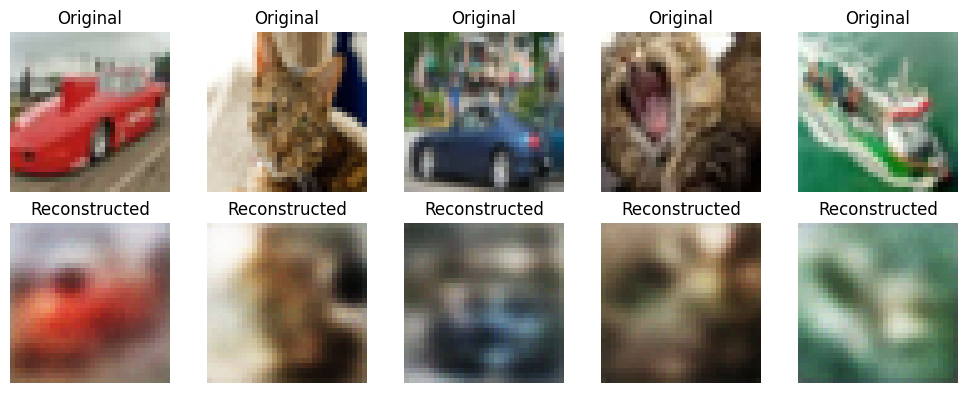

---------------------------------------------------------------------------------------------------
Epoch 65, Mean Test Loss: 3354.477787452408, Learning Rate: 0.000017, Time: 6.73s


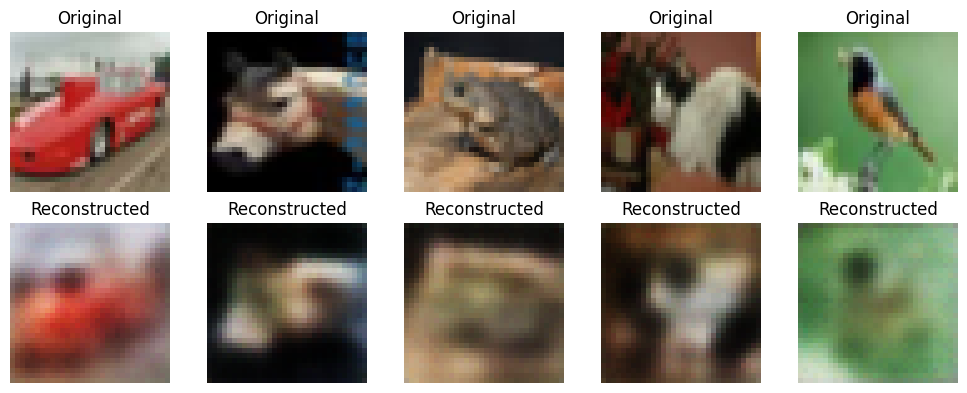

---------------------------------------------------------------------------------------------------
Epoch 66, Mean Test Loss: 3392.1295621847803, Learning Rate: 0.000018, Time: 6.71s


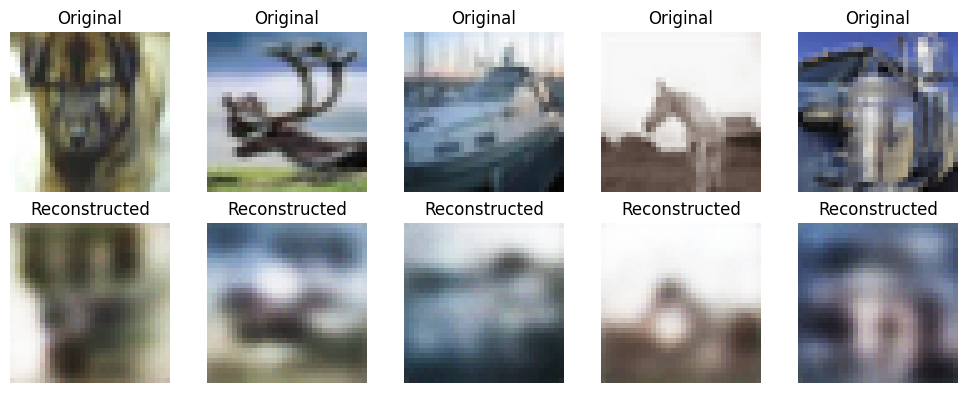

---------------------------------------------------------------------------------------------------
Epoch 67, Mean Test Loss: 3325.9917030817346, Learning Rate: 0.000019, Time: 7.04s


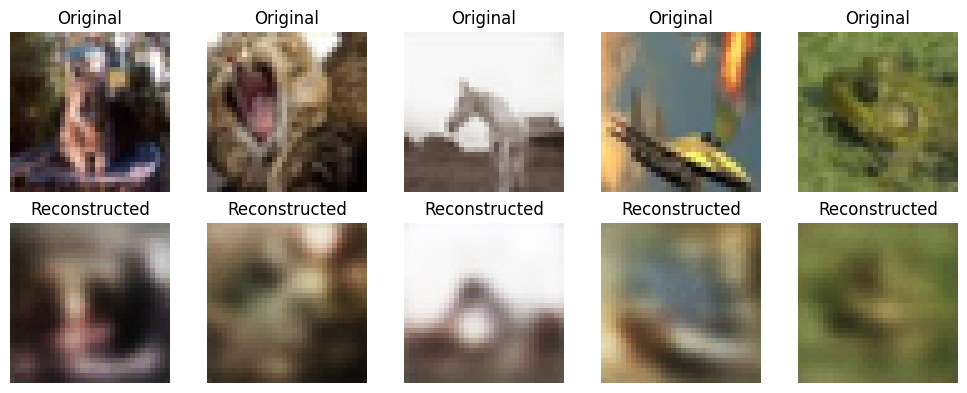

---------------------------------------------------------------------------------------------------
Epoch 68, Mean Test Loss: 3304.3164962575406, Learning Rate: 0.000020, Time: 6.57s


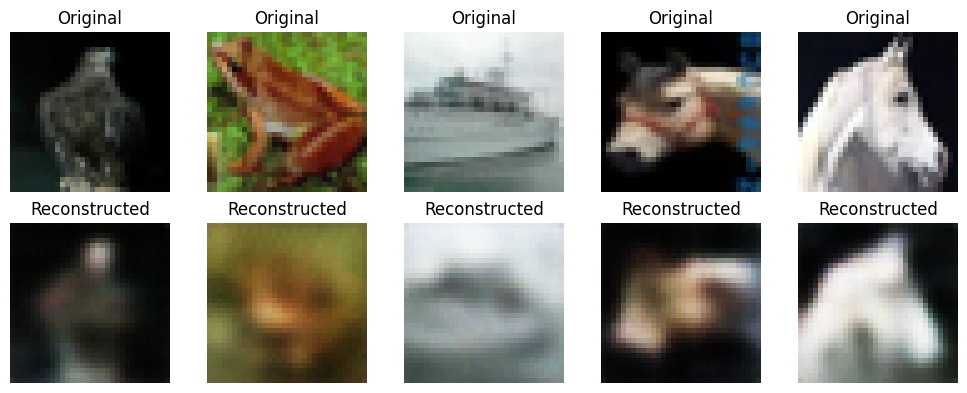

---------------------------------------------------------------------------------------------------
Epoch 69, Mean Test Loss: 3364.2208294445954, Learning Rate: 0.000021, Time: 6.95s


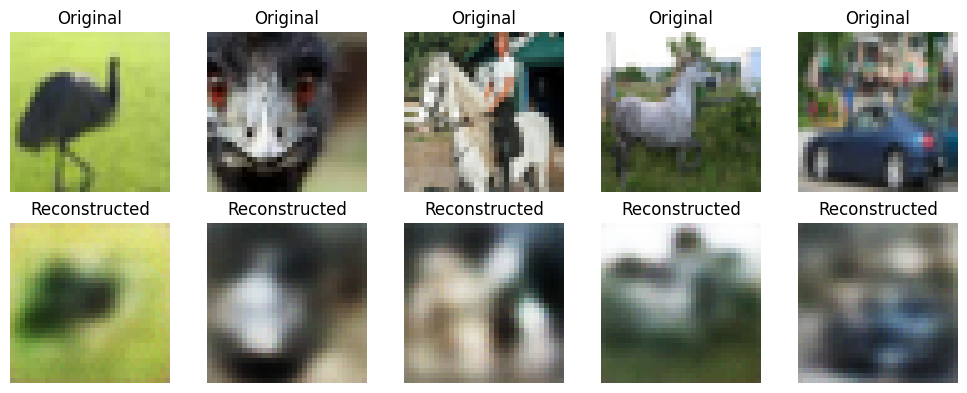

---------------------------------------------------------------------------------------------------
Epoch 70, Mean Test Loss: 3292.430096203768, Learning Rate: 0.000023, Time: 6.86s


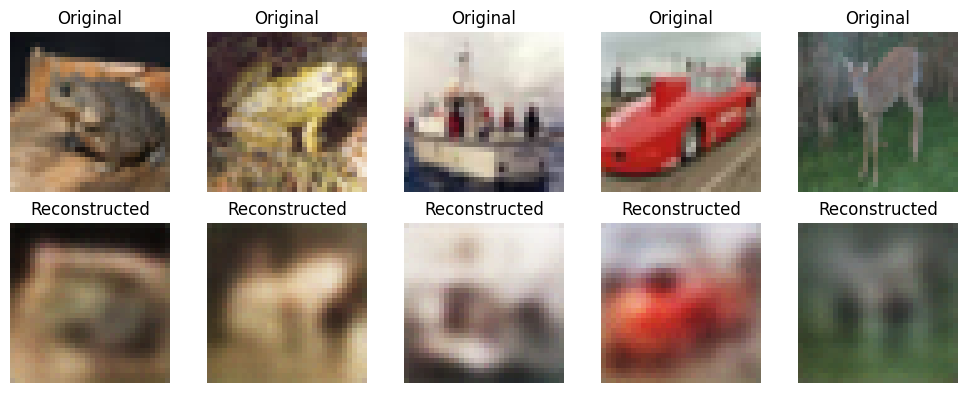

---------------------------------------------------------------------------------------------------
Epoch 71, Mean Test Loss: 3272.424492172048, Learning Rate: 0.000024, Time: 6.68s


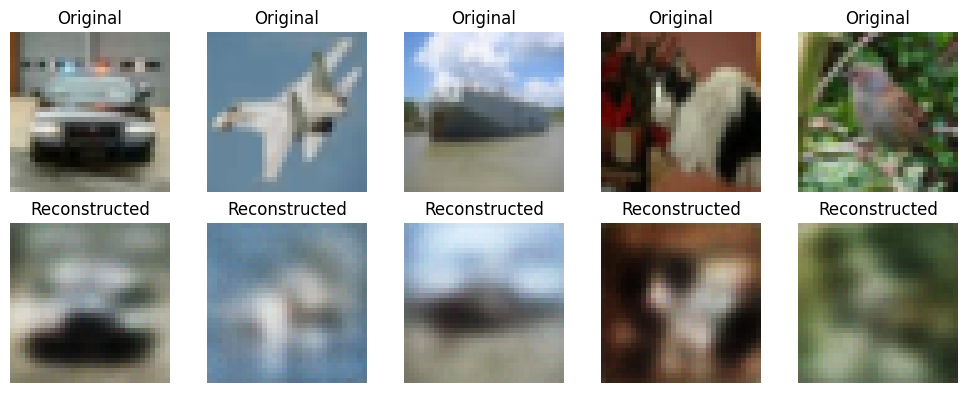

---------------------------------------------------------------------------------------------------
Epoch 72, Mean Test Loss: 3278.225193071969, Learning Rate: 0.000025, Time: 6.83s


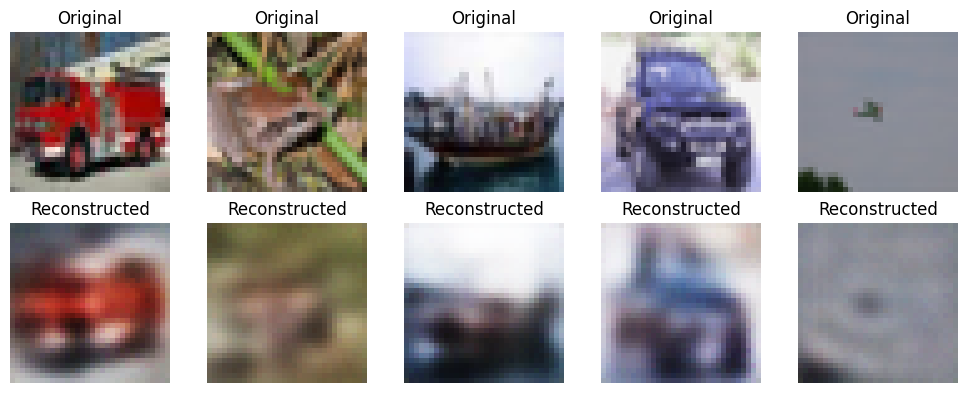

---------------------------------------------------------------------------------------------------
Epoch 73, Mean Test Loss: 3305.2766310293464, Learning Rate: 0.000026, Time: 6.93s


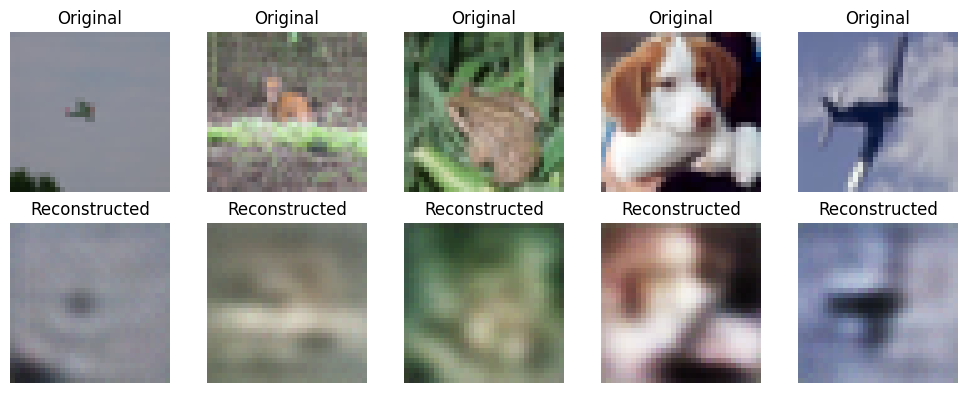

---------------------------------------------------------------------------------------------------
Epoch 74, Mean Test Loss: 3290.864797085146, Learning Rate: 0.000027, Time: 6.63s


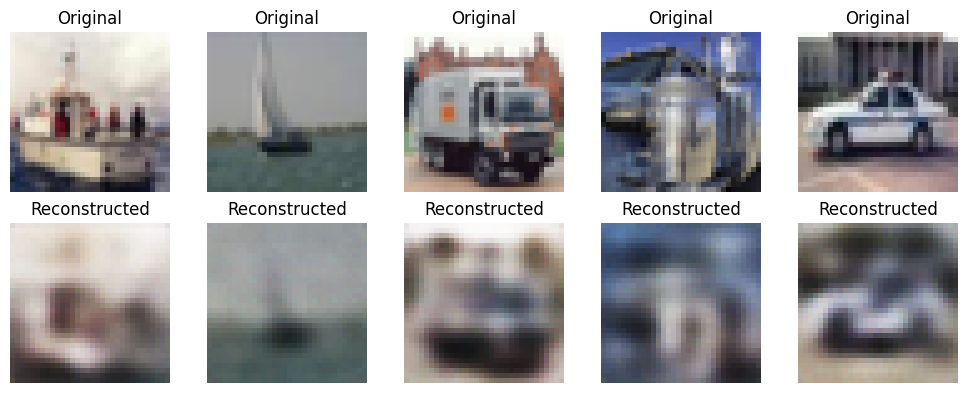

---------------------------------------------------------------------------------------------------
Epoch 75, Mean Test Loss: 3390.8277290440815, Learning Rate: 0.000029, Time: 6.66s


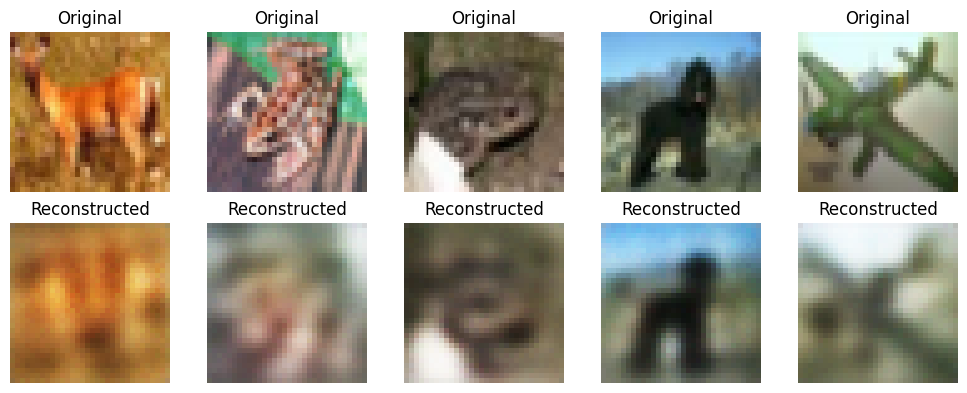

---------------------------------------------------------------------------------------------------


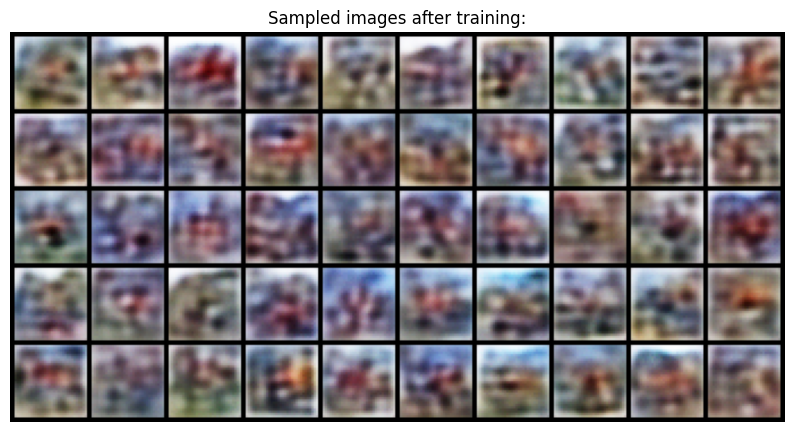

In [4]:
# We want to plot training and testing losses at the end of training
train_losses = []
test_losses = []
learning_rates = []

# Training loop
for epoch in range(num_epochs):
  model.train()
  epoch_start_time = time.time()

  for _, (data, _) in enumerate(train_loader):
    data = data.to(device)
    optimizer.zero_grad()

    with torch.cuda.amp.autocast():
      # Forward pass
      recon_batch, mu, logvar = model(data)

      # Compute loss
      loss = loss_function(recon_batch, data, mu, logvar)
      train_losses.append(loss)

    # Backward pass
    scaler.scale(loss).backward()

    # Optimization step
    scaler.step(optimizer)
    scaler.update()

    # Ivan: add logging here

  # Step the learning rate scheduler
  if scheduler is not None:
    lr = scheduler.get_last_lr()[0]
    scheduler.step()
  else:
    lr = learning_rate
  learning_rates.append(lr)

  # After the epoch, evaluate the accuracy on the test dataset
  mean_loss = evaluate(model, test_loader, loss_function, device)
  test_losses.append(mean_loss)

  elapsed_time = time.time() - epoch_start_time
  print(f'Epoch {epoch + 1}, Mean Test Loss: {mean_loss}, Learning Rate: {lr:.6f}, Time: {elapsed_time:.2f}s')

  # Generate and log test images after each epoch
  plot_reconstruction(model, test_loader, device, num_samples=5)
  print('---------------------------------------------------------------------------------------------------')

# Ivan: add plots here

# Sample some VAE-generated images
sample(model, device, latent_dim, num_samples=50)